In [1]:
try:
    import AI4Water
except ImportError:
    print("Cloning the repository and add it to the path")
    !git clone -b dev https://github.com/AtrCheema/AI4Water.git
    import os
    import site
    site.addsitedir(os.path.join(os.getcwd(), 'AI4Water'))
    import AI4Water

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


C:\Users\USER\Anaconda3\envs\tfgpu21_py37\lib\site-packages\tpot\builtins\__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")
C:\Users\USER\Anaconda3\envs\tfgpu21_py37\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neural_network.multilayer_perceptron module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neural_network. Anything that cannot be imported from sklearn.neural_network is now part of the private API.
  warnings.warn(message, FutureWarning)



**********Pytorch models could not be imported **********



In [2]:
import os
from AI4Water.utils.spatial_processing import MakeHRUs

In [3]:
ai4water_dir = os.path.dirname(os.path.dirname(AI4Water.__file__))
shapefile_paths = os.path.join(ai4water_dir, 'examples', 'paper_figs', 'shapefiles')
assert os.path.exists(shapefile_paths)
assert len(os.listdir(shapefile_paths))>35

In [4]:
Soil_shp = os.path.join(shapefile_paths, 'soil.shp')

SubBasin_shp = os.path.join(shapefile_paths, 'sub_basins.shp')
slope_shp = os.path.join(shapefile_paths, 'slope.shp')

years = {2011: {'shapefile': os.path.join(shapefile_paths, 'lu2011.shp'), 'feature': 'NAME'},
         2012: {'shapefile': os.path.join(shapefile_paths, 'lu2012.shp'), 'feature': 'NAME'},
         2013: {'shapefile': os.path.join(shapefile_paths, 'lu2013.shp'), 'feature': 'NAME'},
         2014: {'shapefile': os.path.join(shapefile_paths, 'lu2014.shp'), 'feature': 'NAME'},
         # 2015:"D:\\Laos\\data\\landuse\\shapefiles\\LU2015.shp"
         }

### `unique_sub`
The simplest case, where the HRU is formed by subbaisns.

Checking validity of landuse shapefile


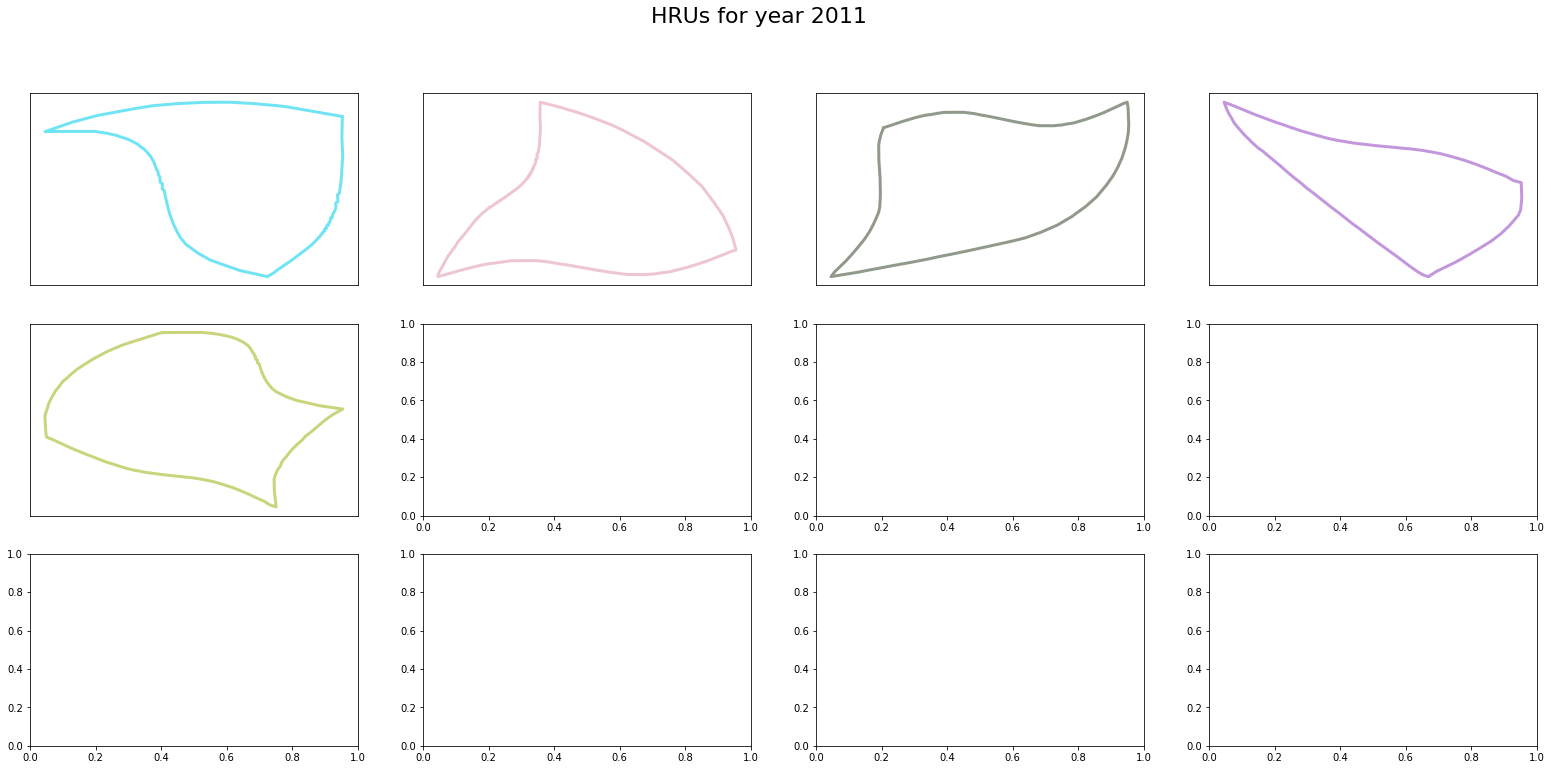

Checking validity of landuse shapefile


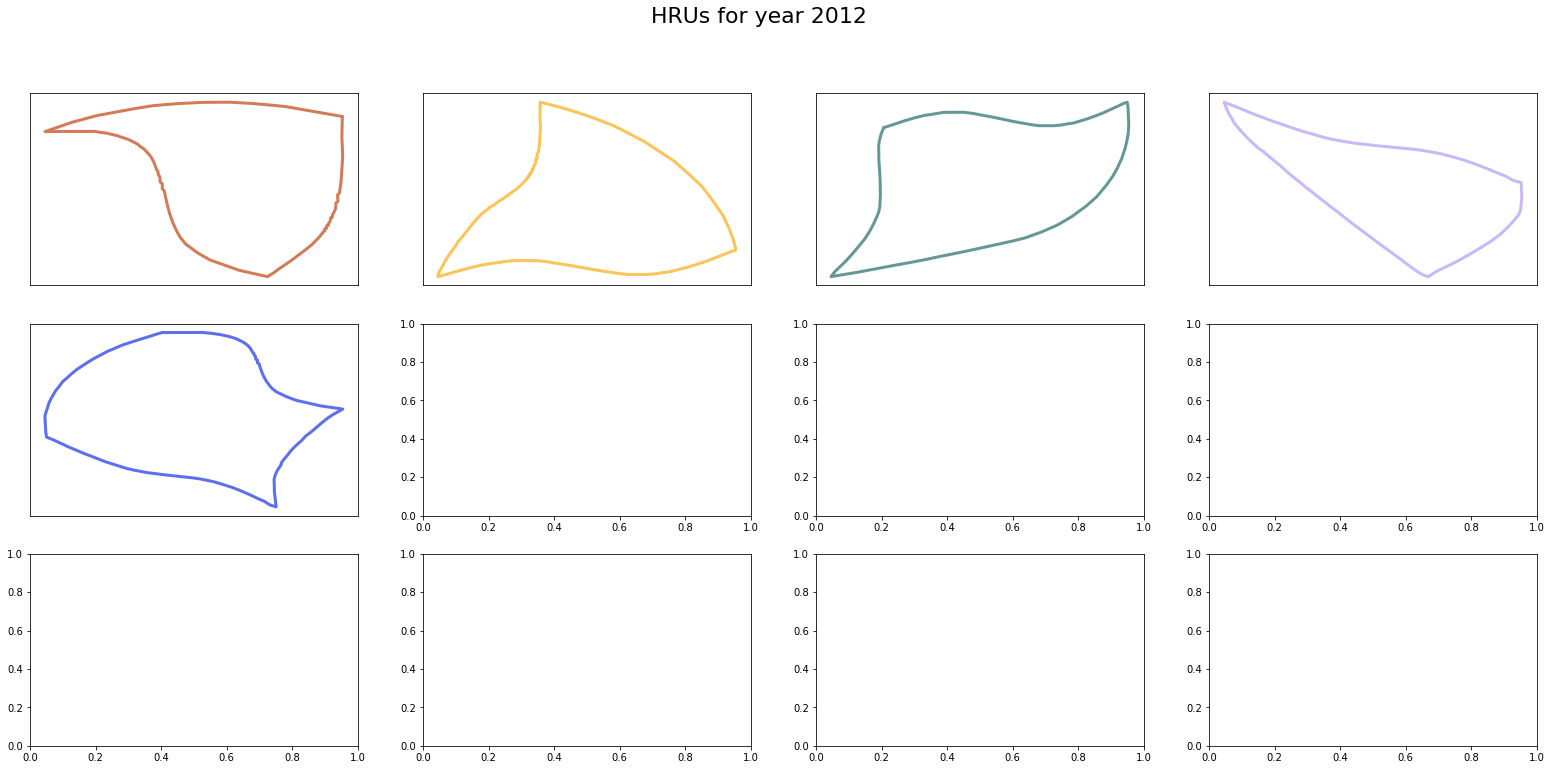

Checking validity of landuse shapefile


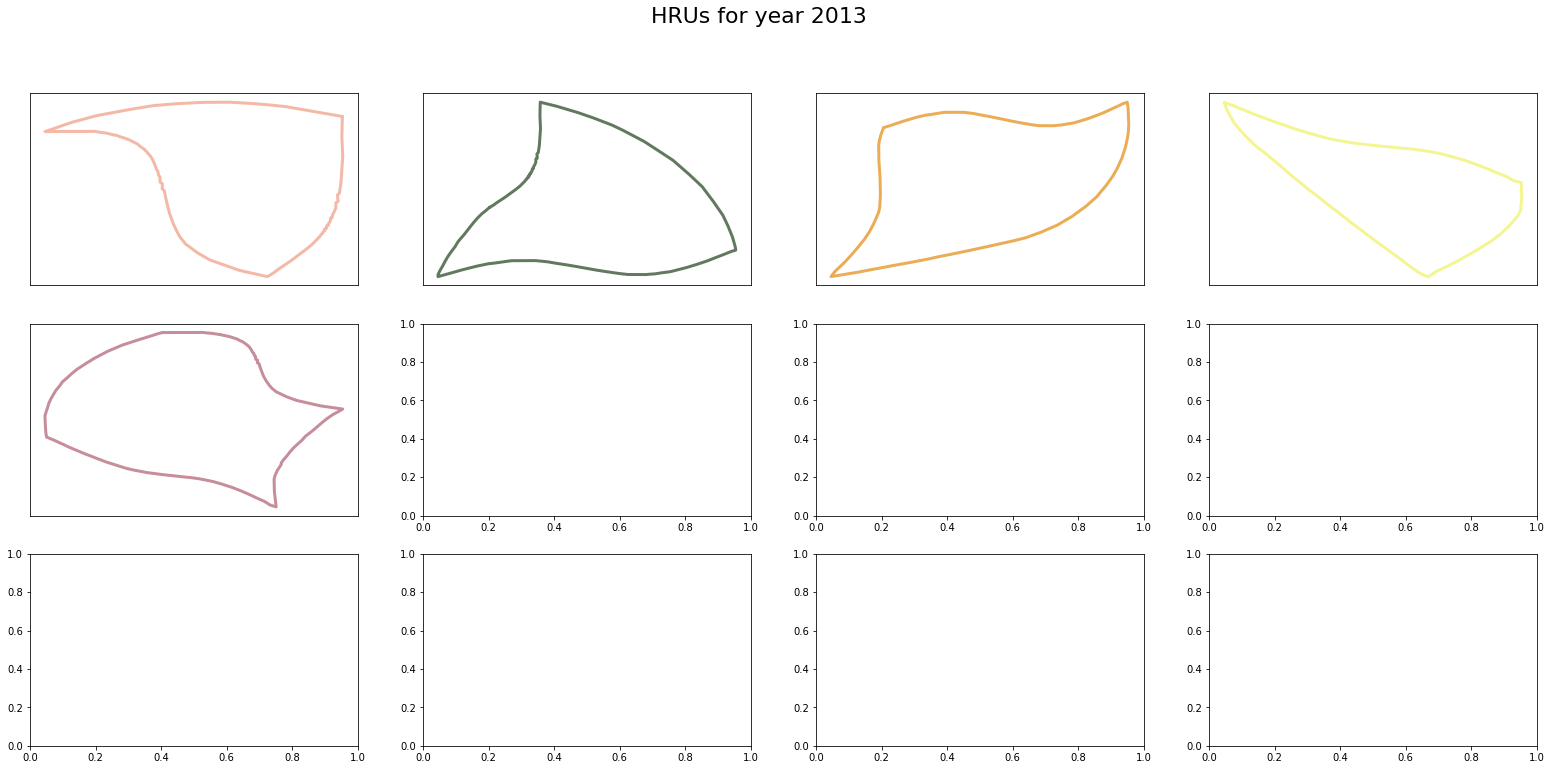

Checking validity of landuse shapefile


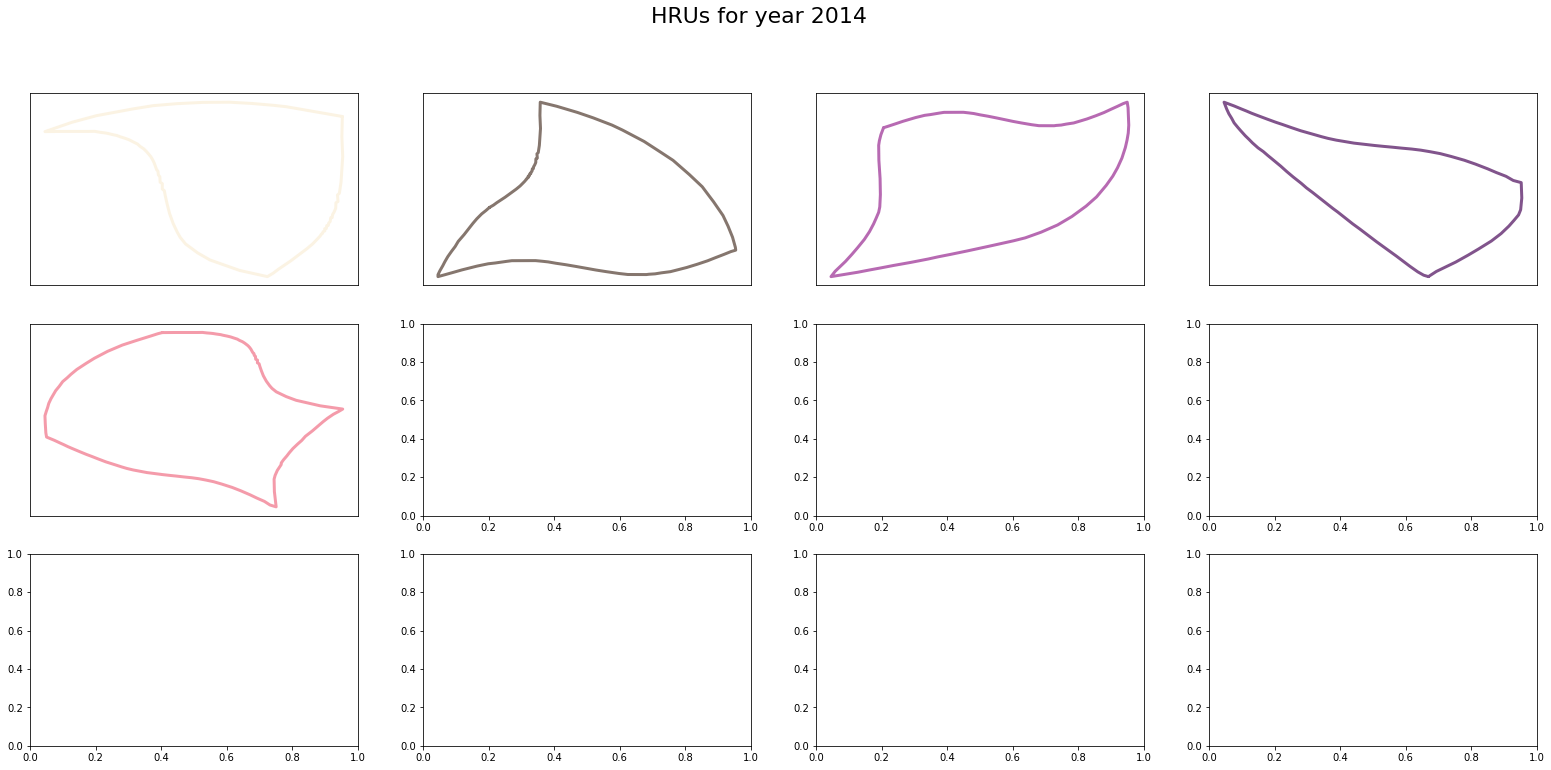

In [4]:
hru_object = MakeHRUs('unique_sub',
                      index={2011: None, 2012: None, 2013:None, 2014:None},
                      subbasins_shape={'shapefile': SubBasin_shp, 'feature': 'id'}, 
                     )

hru_object.call(plot_hrus=True)


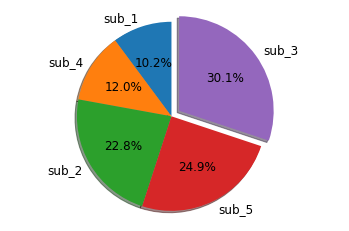

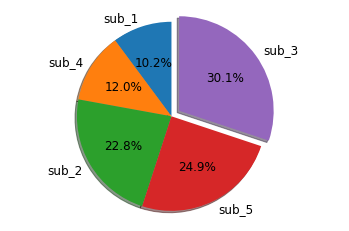

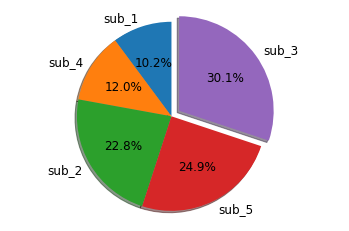

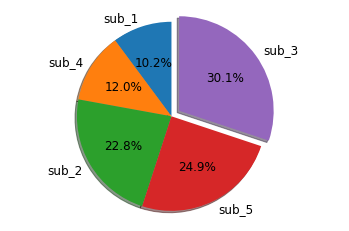

In [5]:
for yr in years:
    hru_object.draw_pie(yr, title=False, n_merge=0, save=True, textprops={'fontsize': '12'})


d:\mytools\ai4water\AI4Water\utils\spatial_processing.py:423: UserWarning: AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 6.
  plt.savefig(f'{name}_hru_as_ts.png', dpi=300, bbox_inches=bbox_inches)
C:\Users\USER\Anaconda3\envs\tfgpu21_py37\lib\site-packages\ipykernel\pylab\backend_inline.py:183: UserWarning: AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 6.
  for label in axis.get_ticklabels()])
C:\Users\USER\Anaconda3\envs\tfgpu21_py37\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 6.
  fig.canvas.print_figure(byt

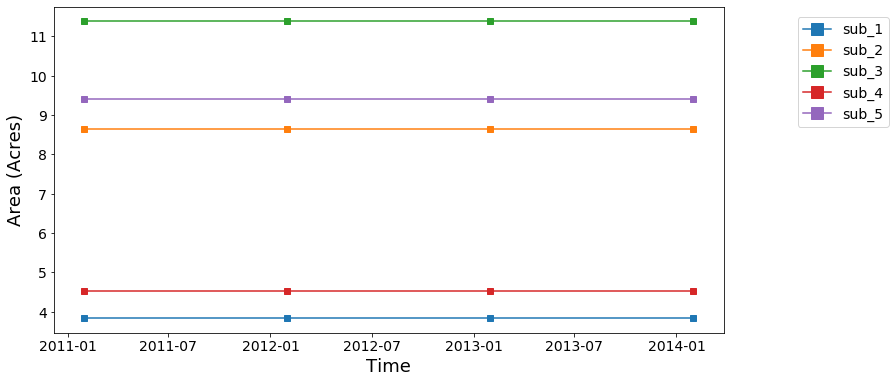

In [6]:
hru_object.plot_as_ts(min_xticks=3, max_xticks=4, save=True)


### `unique_soil`

Checking validity of landuse shapefile
soil 0 is valid now
soil 1 is valid now
soil 2 is valid now


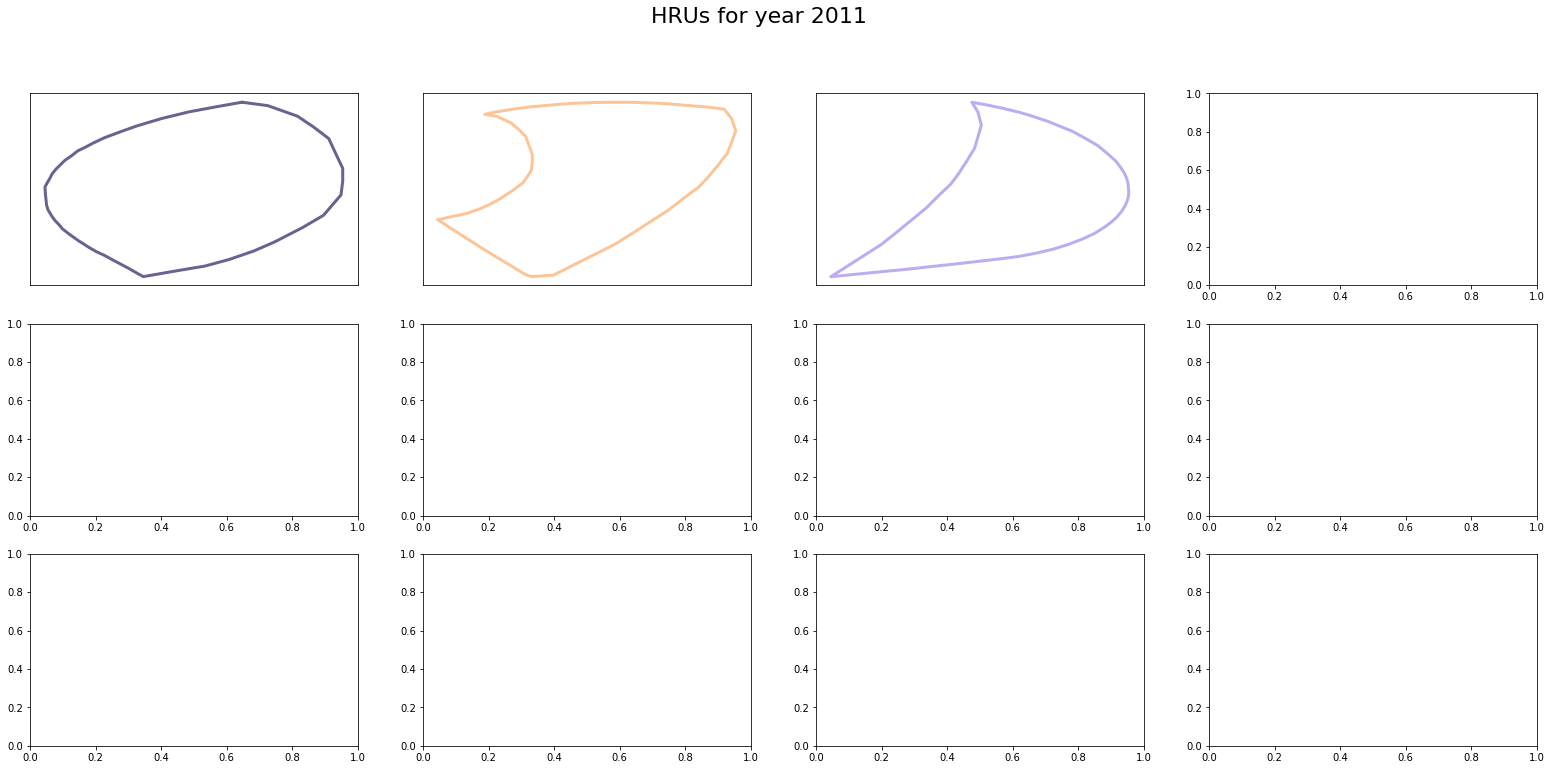

Checking validity of landuse shapefile
soil 0 is valid now
soil 1 is valid now
soil 2 is valid now


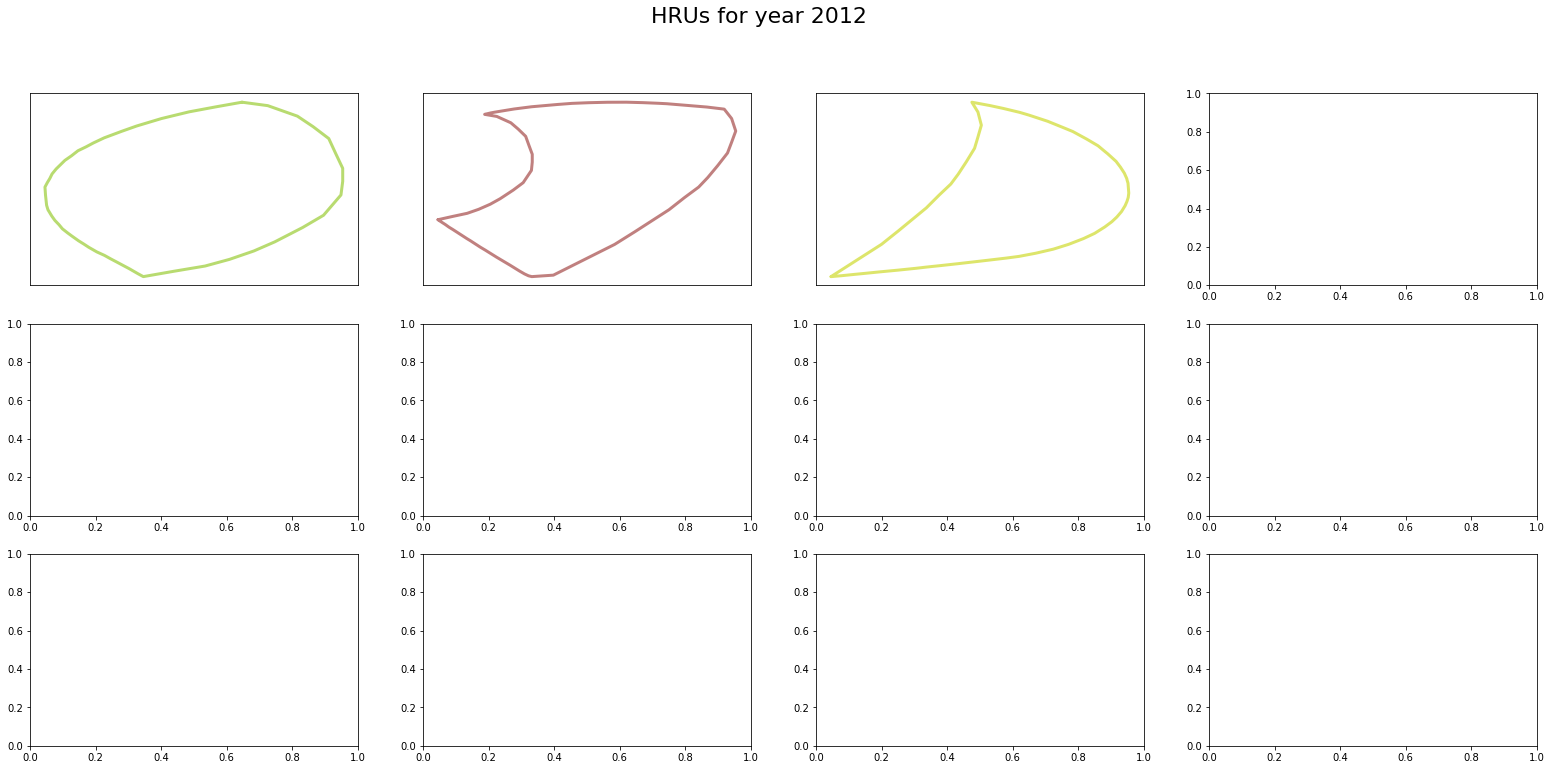

Checking validity of landuse shapefile
soil 0 is valid now
soil 1 is valid now
soil 2 is valid now


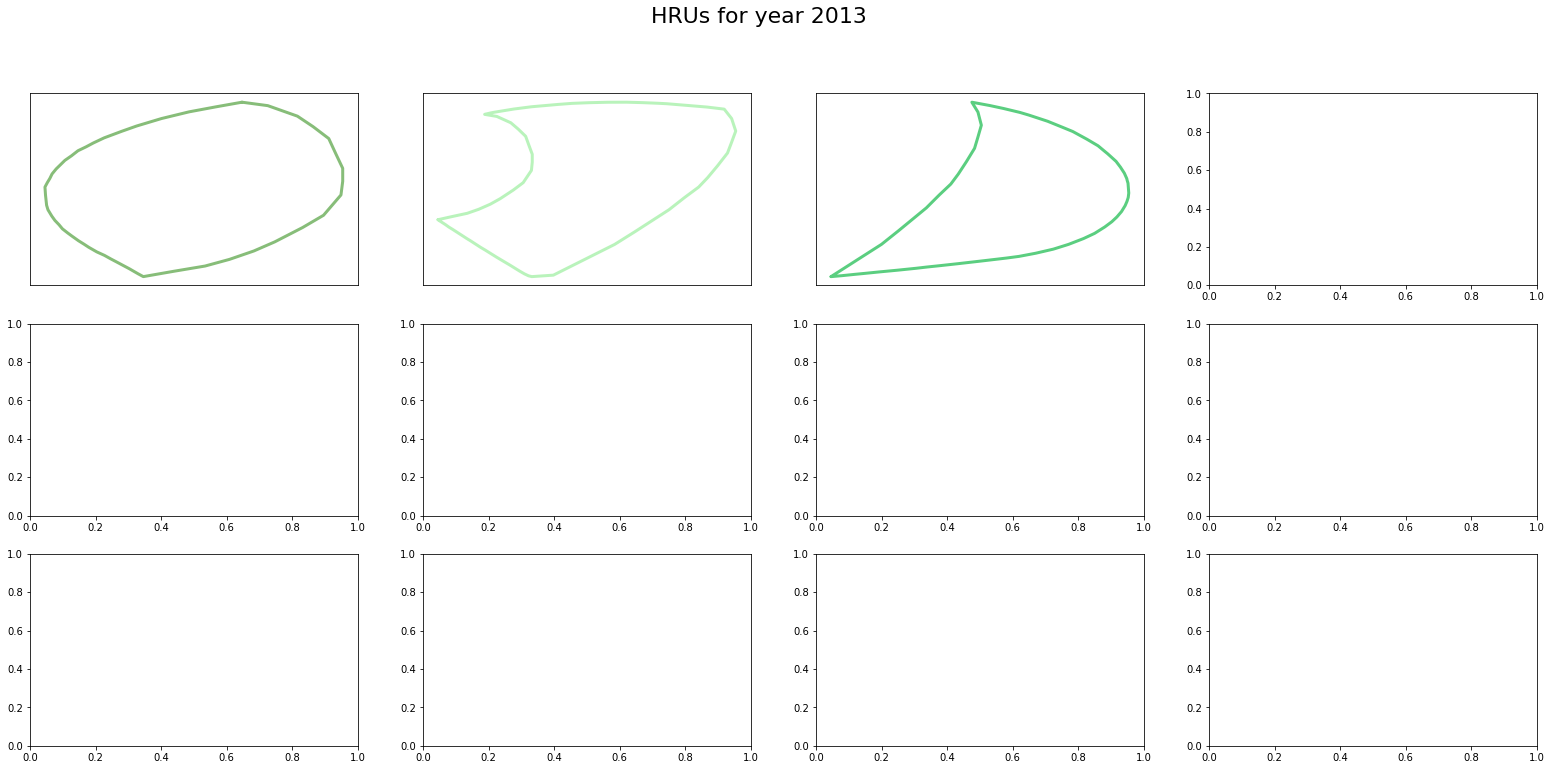

Checking validity of landuse shapefile
soil 0 is valid now
soil 1 is valid now
soil 2 is valid now


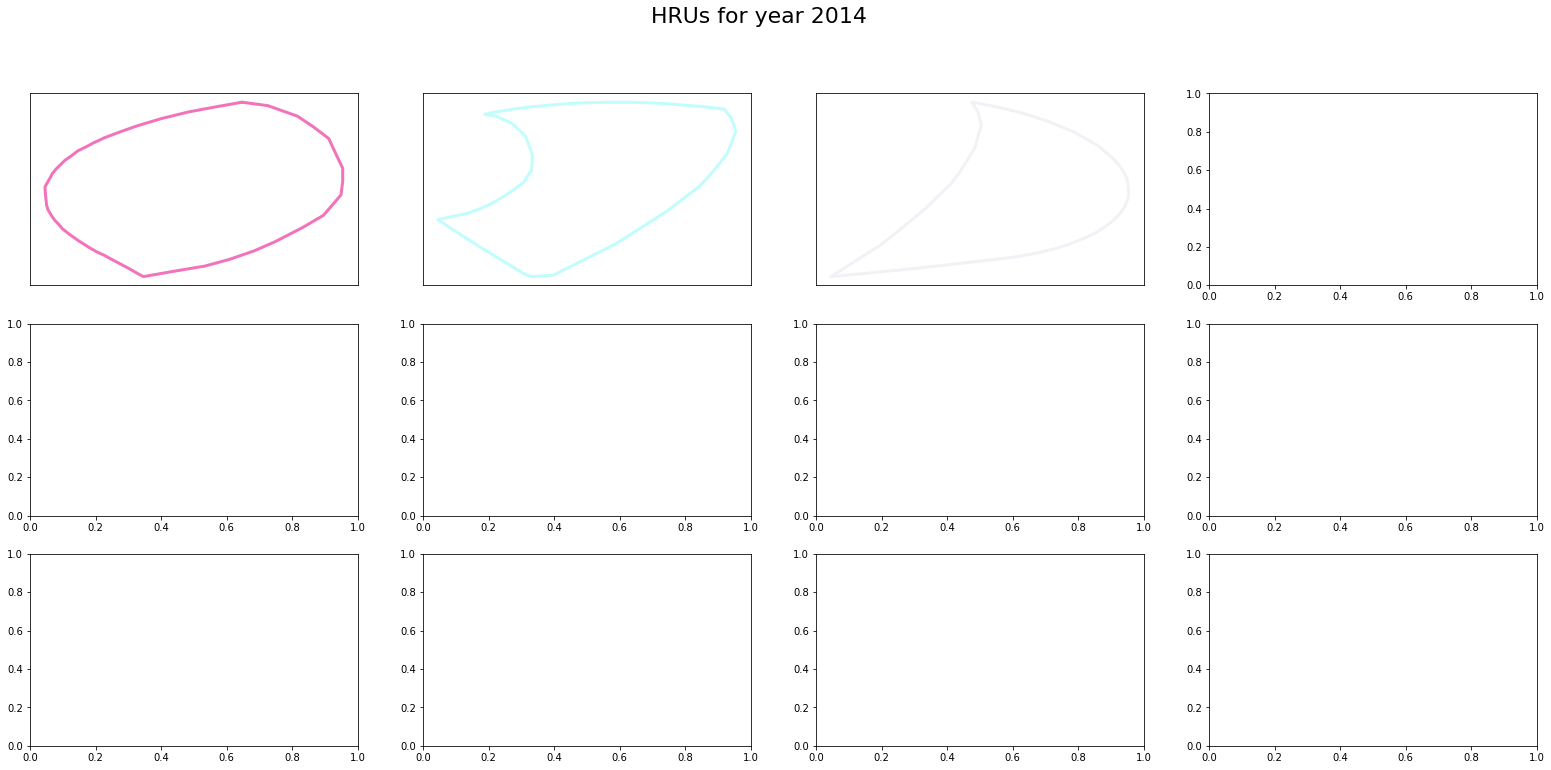

In [7]:
hru_object = MakeHRUs('unique_soil',
                      index={2011: None, 2012: None, 2013:None, 2014:None}, 
                      soil_shape={'shapefile': Soil_shp, 'feature': 'NAME'}
                     )

hru_object.call(plot_hrus=True)

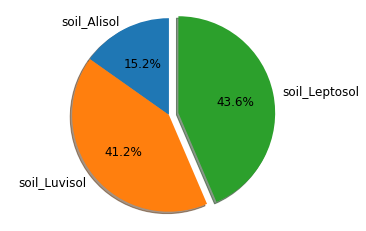

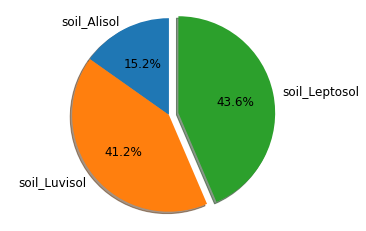

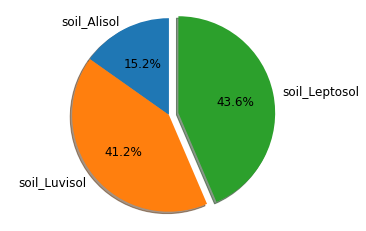

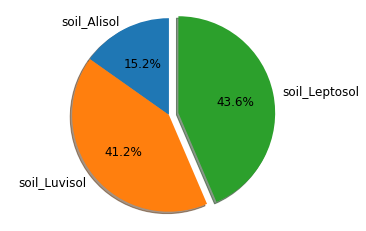

In [8]:
for yr in years:
    hru_object.draw_pie(yr, title=False, save=True, textprops={'fontsize': '12'})

d:\mytools\ai4water\AI4Water\utils\spatial_processing.py:423: UserWarning: AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 6.
  plt.savefig(f'{name}_hru_as_ts.png', dpi=300, bbox_inches=bbox_inches)
C:\Users\USER\Anaconda3\envs\tfgpu21_py37\lib\site-packages\ipykernel\pylab\backend_inline.py:183: UserWarning: AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 6.
  for label in axis.get_ticklabels()])
C:\Users\USER\Anaconda3\envs\tfgpu21_py37\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 6.
  fig.canvas.print_figure(byt

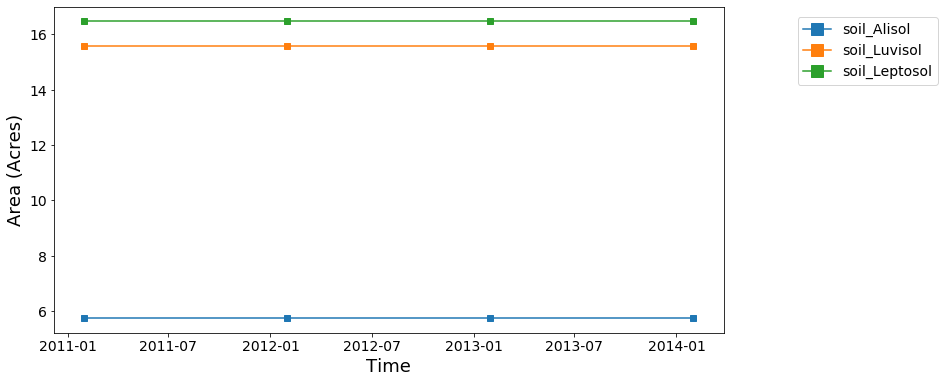

In [9]:
hru_object.plot_as_ts(min_xticks=3, max_xticks=4, save=True)

### `unique_lu`
Since the land use varies with time, we will include it in index.

Checking validity of landuse shapefile
soil 0 is valid now
soil 1 is valid now
soil 2 is valid now
soil 3 is valid now


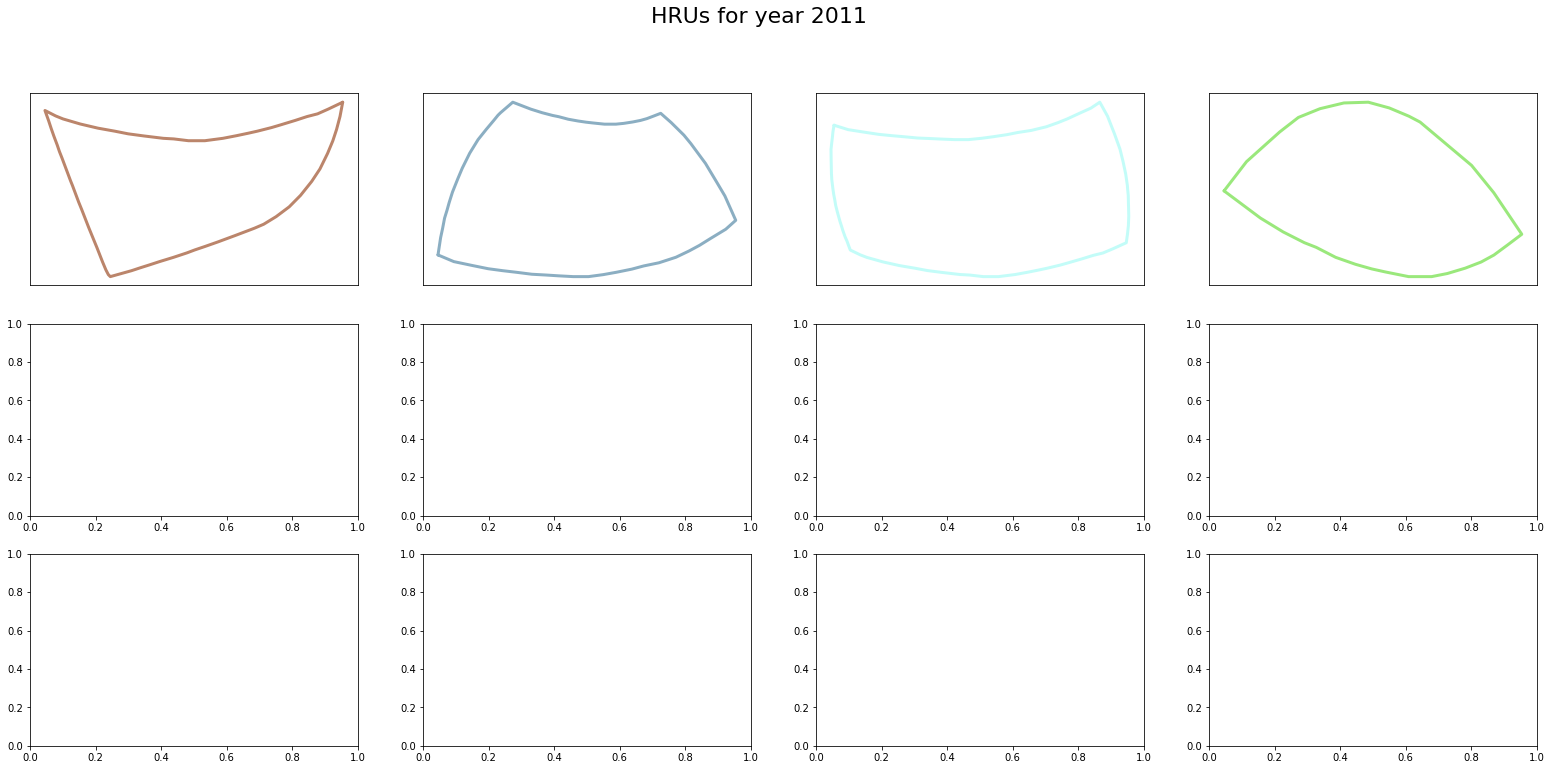

Checking validity of landuse shapefile
soil 0 is valid now
soil 1 is valid now
soil 2 is valid now
soil 3 is valid now


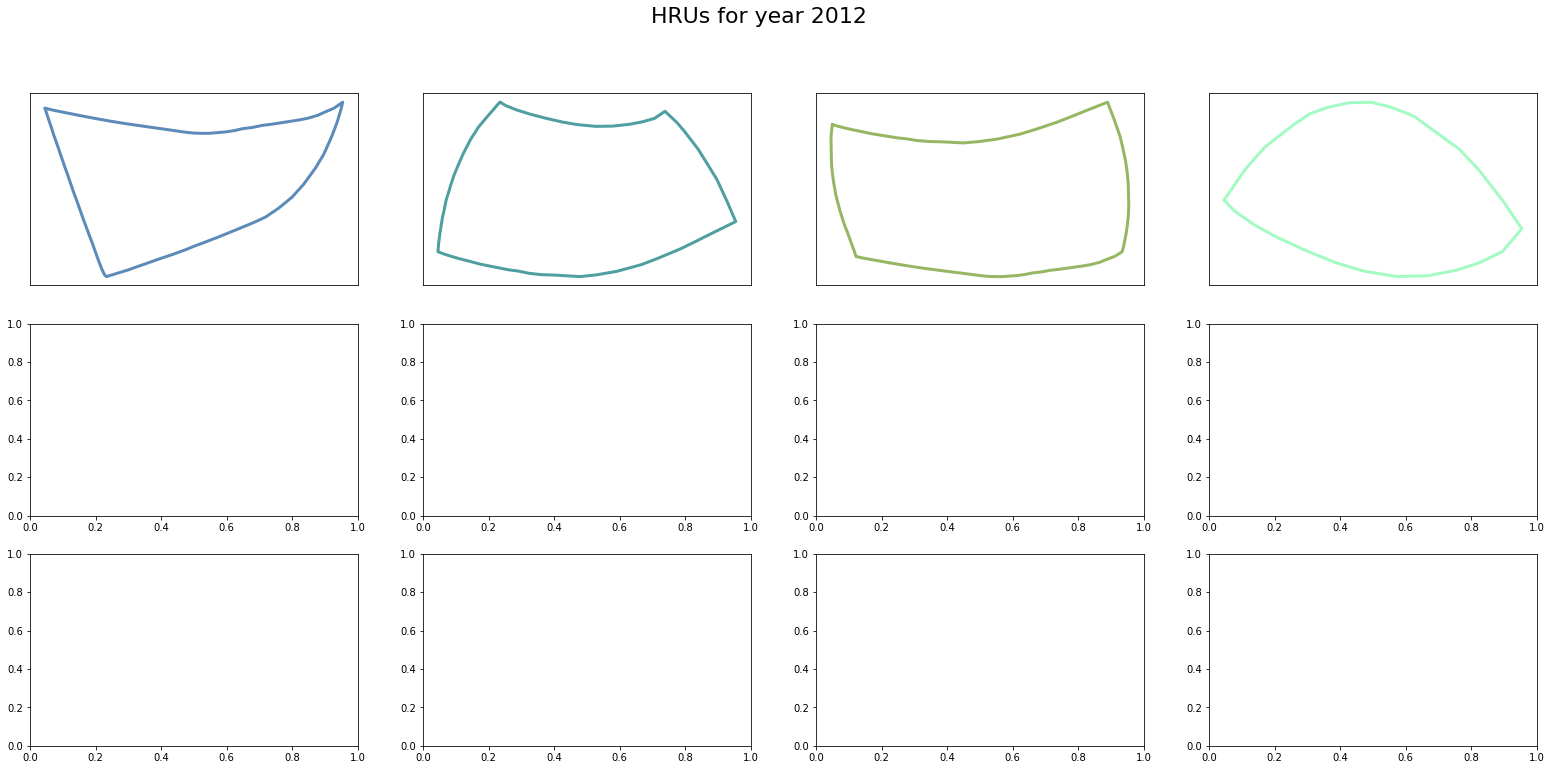

Checking validity of landuse shapefile
soil 0 is valid now
soil 1 is valid now
soil 2 is valid now
soil 3 is valid now


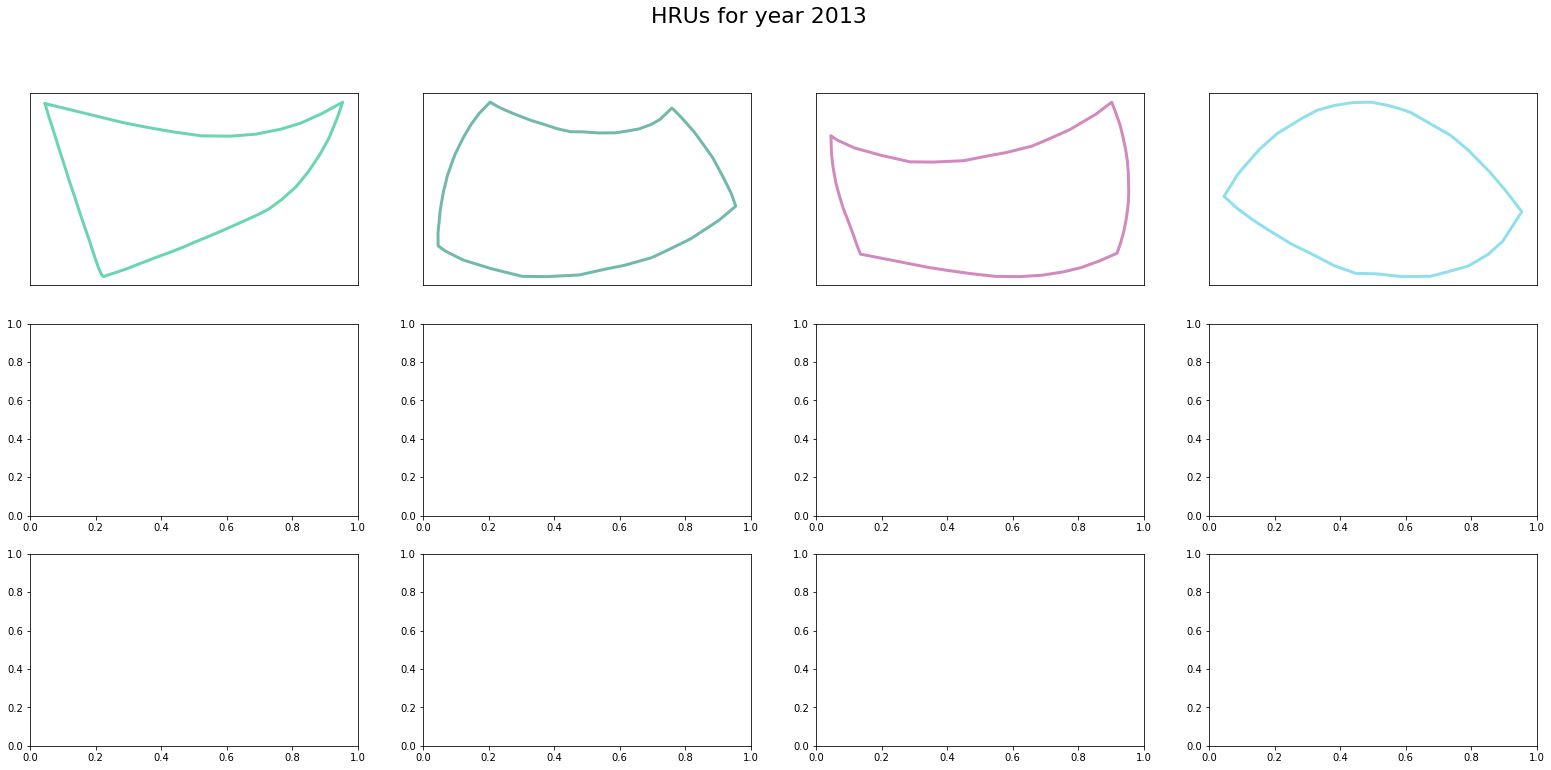

Checking validity of landuse shapefile
soil 0 is valid now
soil 1 is valid now
soil 2 is valid now
soil 3 is valid now


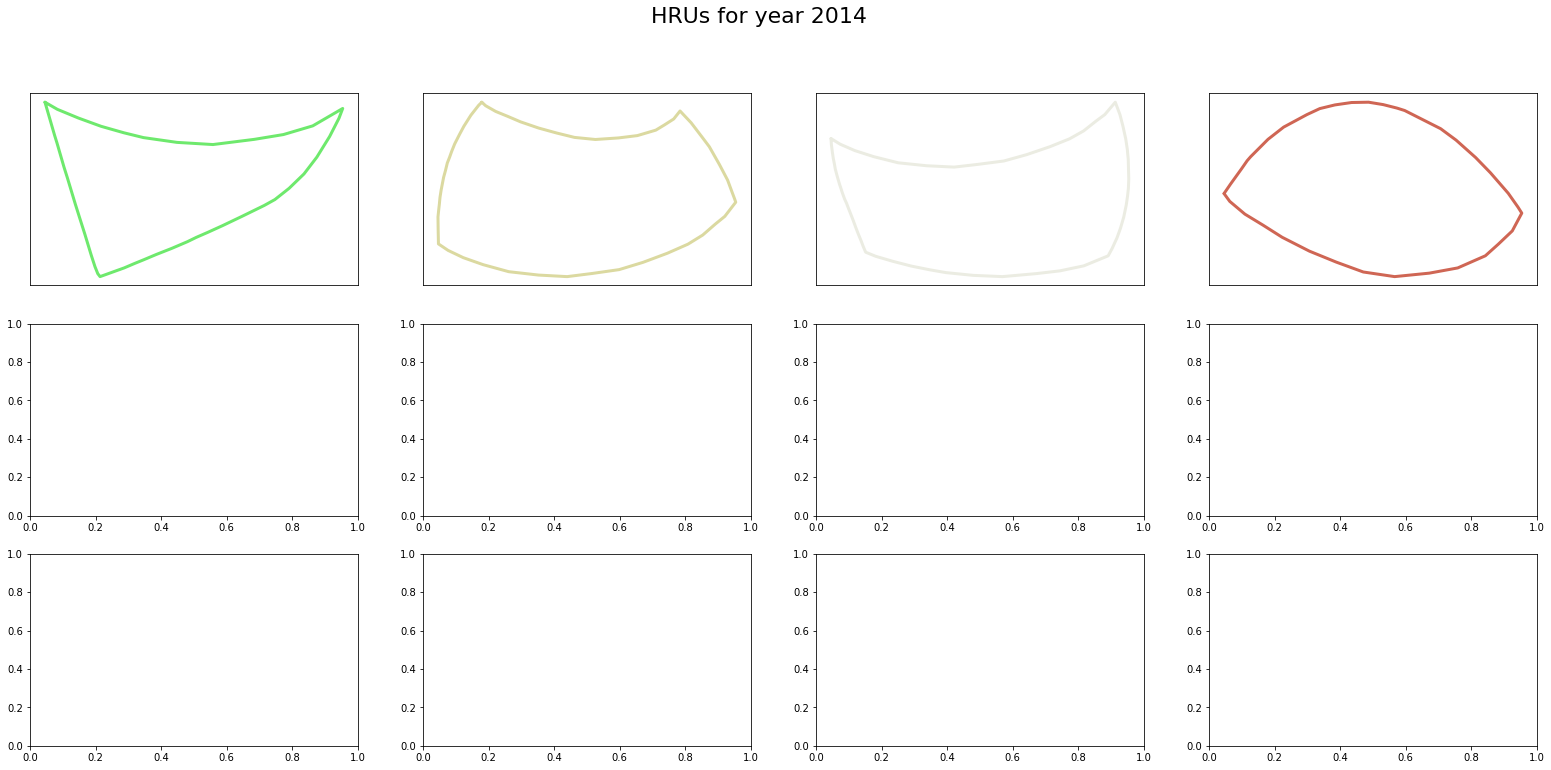

In [10]:
hru_object = MakeHRUs('unique_soil',
                      index=years,
                     )

hru_object.call(plot_hrus=True)

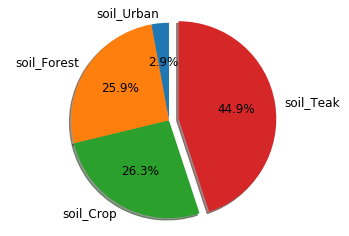

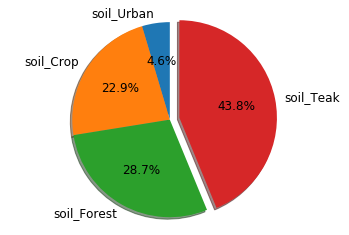

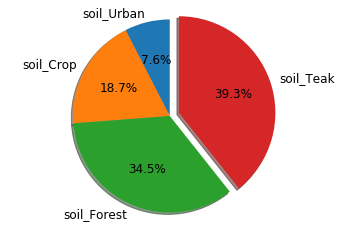

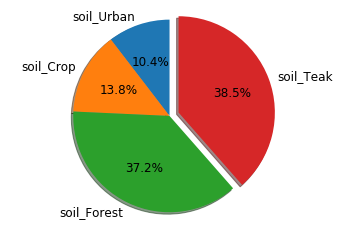

In [11]:
for yr in years:
    hru_object.draw_pie(yr, title=False, save=True, textprops={'fontsize': '12'})

d:\mytools\ai4water\AI4Water\utils\spatial_processing.py:423: UserWarning: AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 6.
  plt.savefig(f'{name}_hru_as_ts.png', dpi=300, bbox_inches=bbox_inches)
C:\Users\USER\Anaconda3\envs\tfgpu21_py37\lib\site-packages\ipykernel\pylab\backend_inline.py:183: UserWarning: AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 6.
  for label in axis.get_ticklabels()])
C:\Users\USER\Anaconda3\envs\tfgpu21_py37\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 6.
  fig.canvas.print_figure(byt

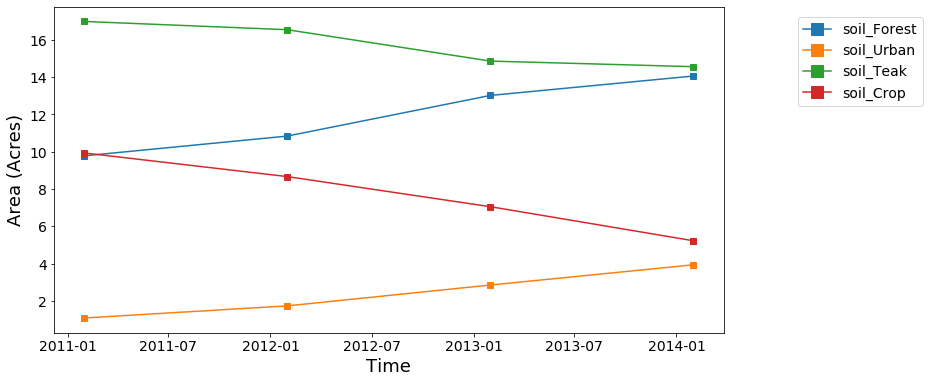

In [12]:
hru_object.plot_as_ts(min_xticks=3, max_xticks=4, save=True)

### `unique_slope`

Checking validity of landuse shapefile
slope 0 is valid now
slope 1 is valid now
slope 2 is valid now
Checking validity of landuse shapefile
slope 0 is valid now
slope 1 is valid now
slope 2 is valid now
Checking validity of landuse shapefile
slope 0 is valid now
slope 1 is valid now
slope 2 is valid now
Checking validity of landuse shapefile
slope 0 is valid now
slope 1 is valid now
slope 2 is valid now


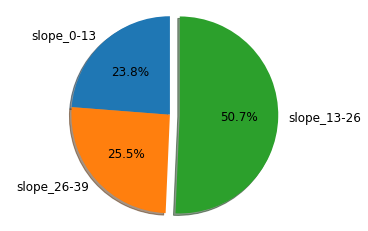

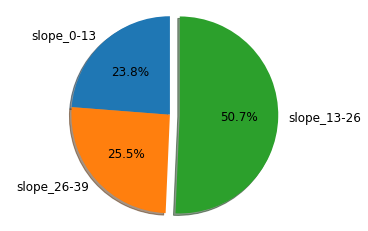

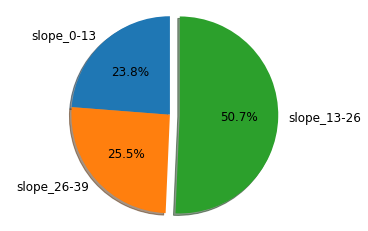

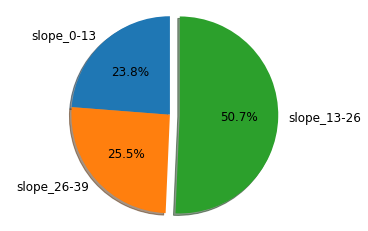

In [13]:
hru_object = MakeHRUs('unique_slope',
                      index={2011: None, 2012: None, 2013:None, 2014:None},
                      slope_shape={'shapefile': slope_shp, 'feature': 'percent'}
                     )

hru_object.call(plot_hrus=False)
for yr in years:
    hru_object.draw_pie(yr, title=False, save=True, textprops={'fontsize': '12'})

d:\mytools\ai4water\AI4Water\utils\spatial_processing.py:423: UserWarning: AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 6.
  plt.savefig(f'{name}_hru_as_ts.png', dpi=300, bbox_inches=bbox_inches)
C:\Users\USER\Anaconda3\envs\tfgpu21_py37\lib\site-packages\ipykernel\pylab\backend_inline.py:183: UserWarning: AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 6.
  for label in axis.get_ticklabels()])
C:\Users\USER\Anaconda3\envs\tfgpu21_py37\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 6.
  fig.canvas.print_figure(byt

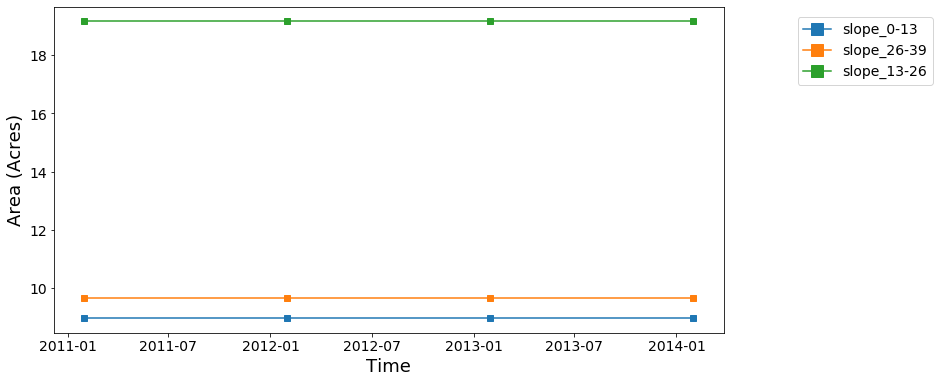

In [14]:
hru_object.plot_as_ts(min_xticks=3, max_xticks=4, save=True)

### `unique_lu_sub`

Checking validity of landuse shapefile


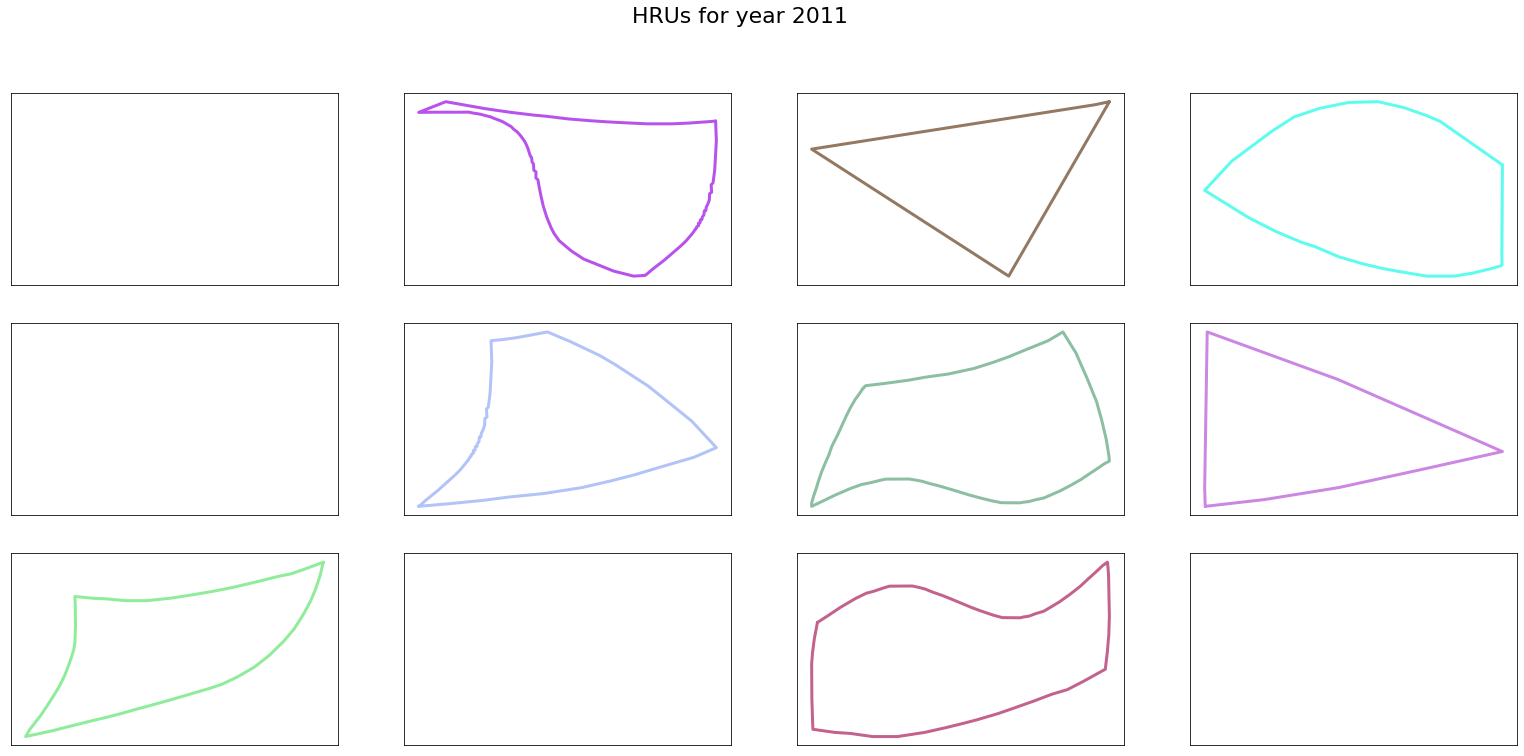

Checking validity of landuse shapefile


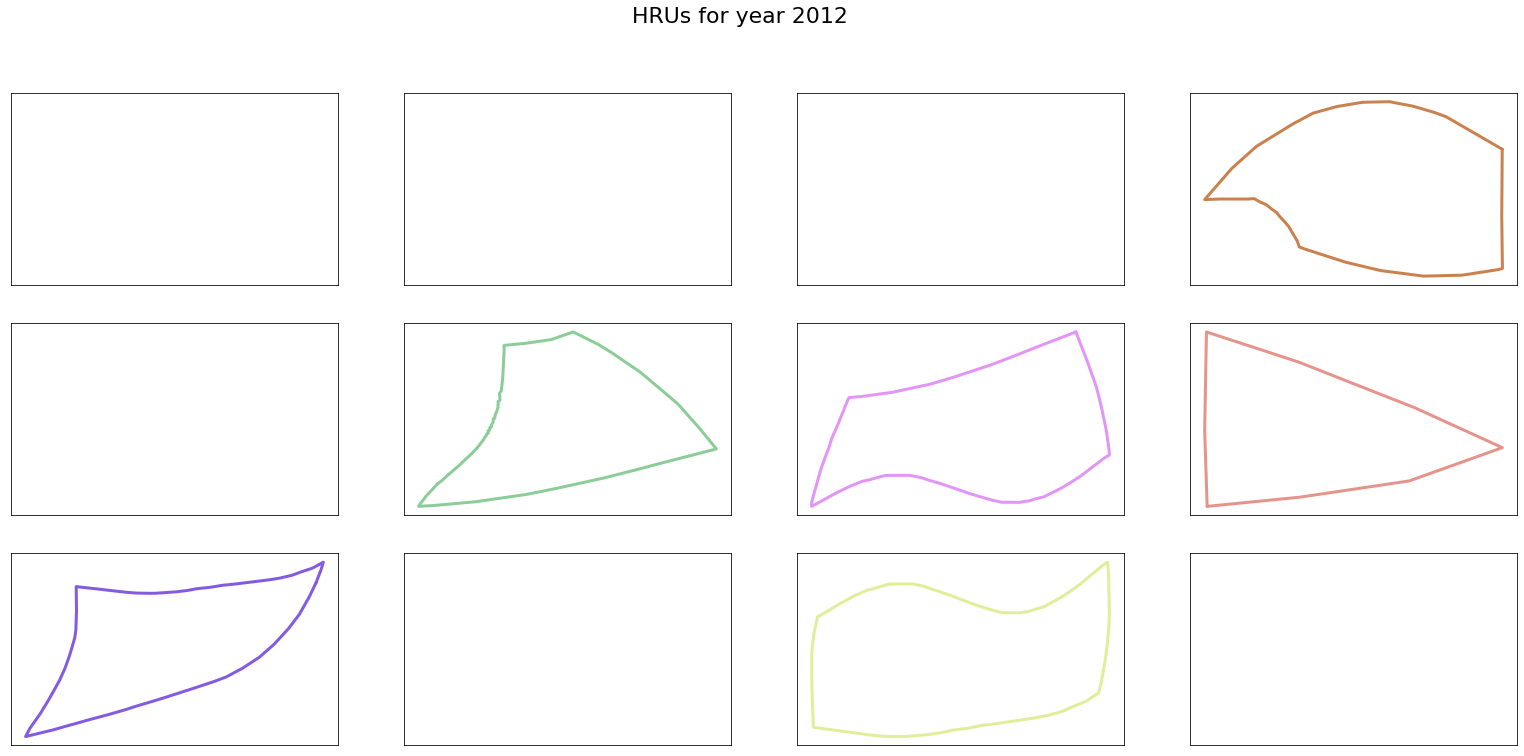

Checking validity of landuse shapefile


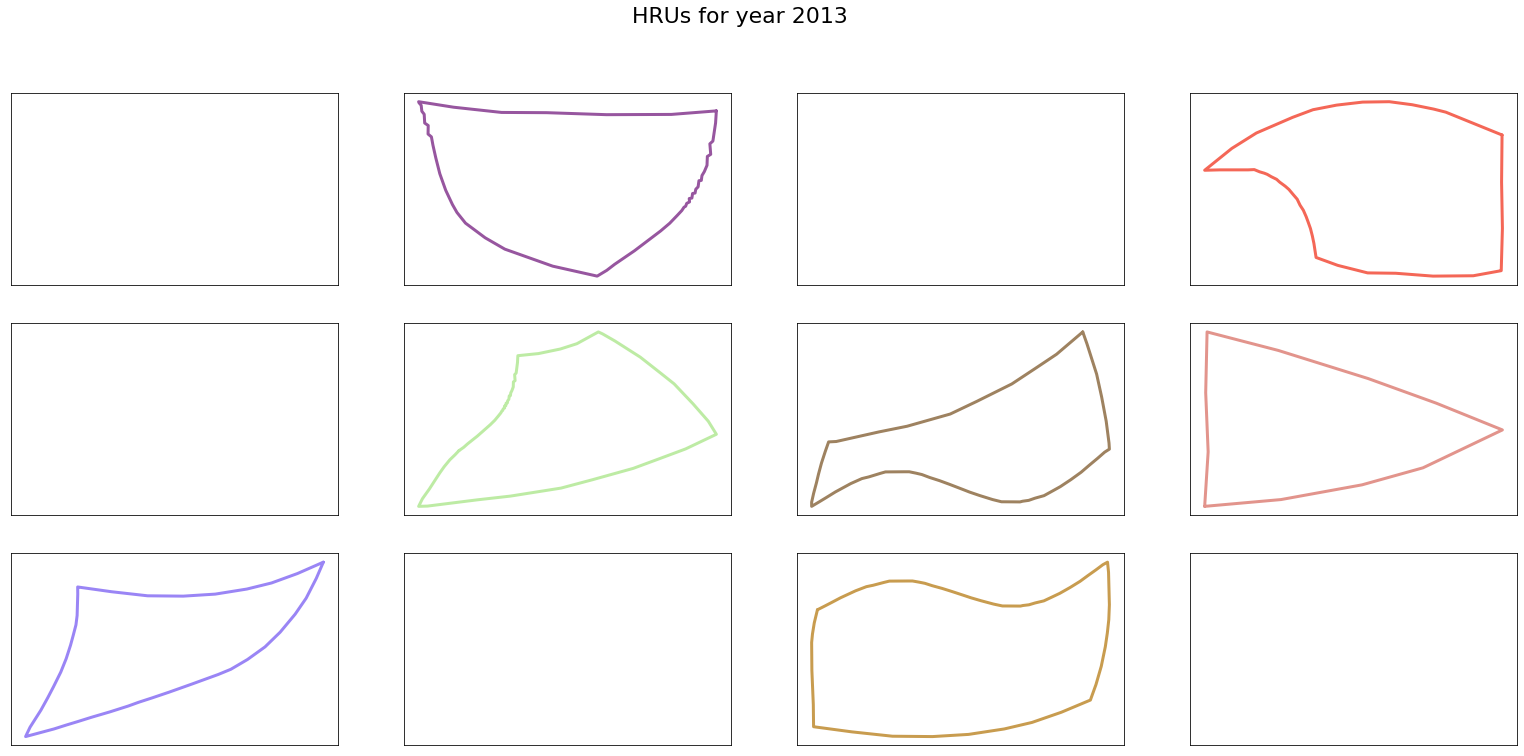

Checking validity of landuse shapefile


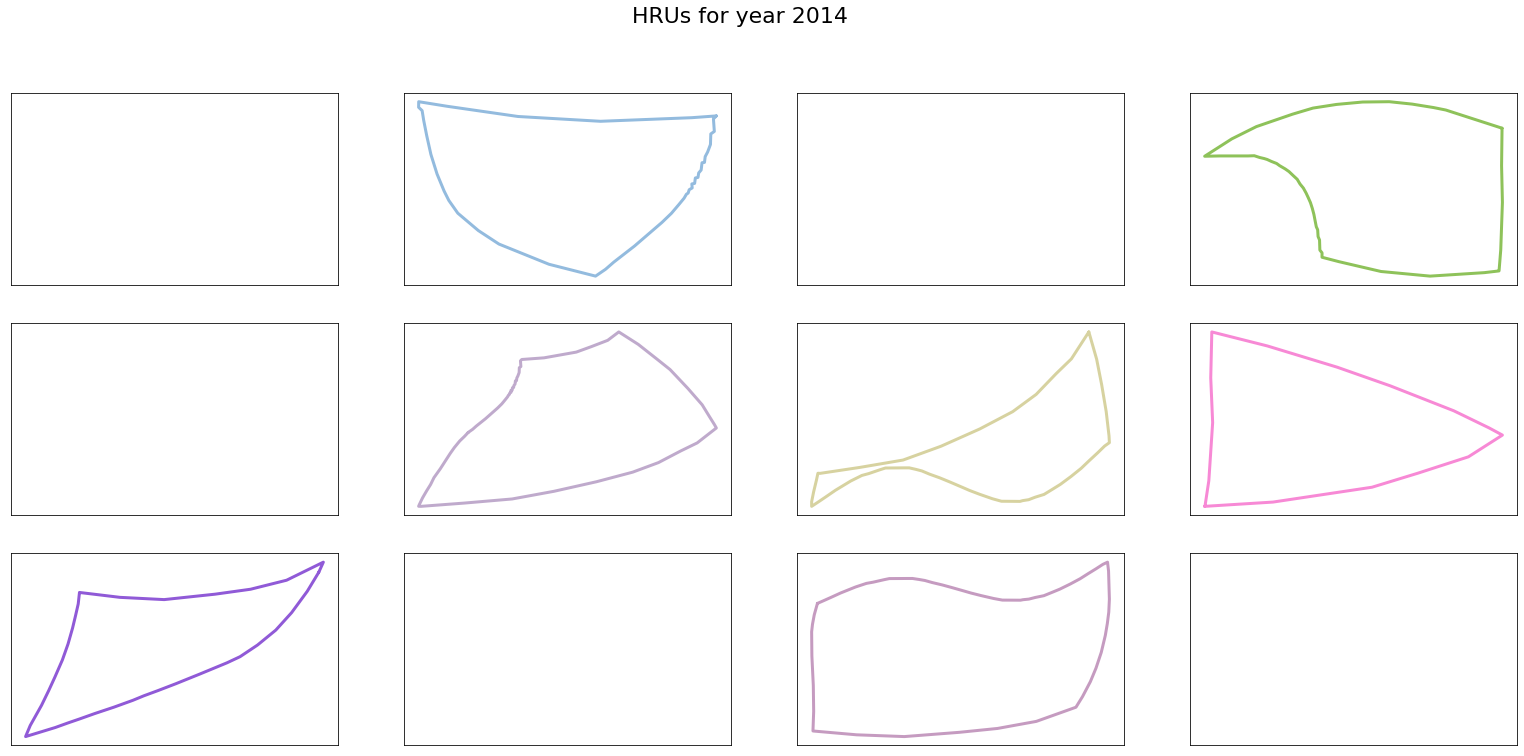

In [15]:
hru_object = MakeHRUs('unique_lu_sub',
                      index=years,
                      subbasins_shape={'shapefile': SubBasin_shp, 'feature': 'id'}
                     )

hru_object.call()

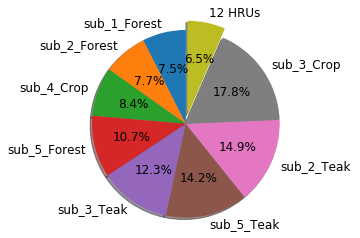

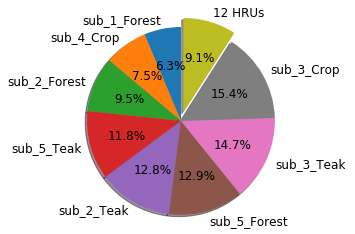

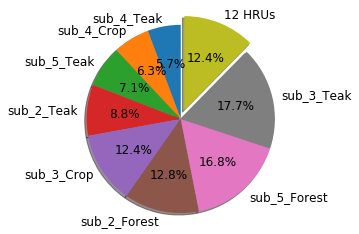

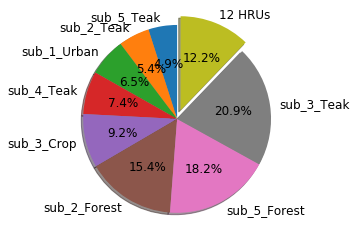

In [16]:
for yr in years:
    hru_object.draw_pie(yr, n_merge=12, title=False, save=True, textprops={'fontsize': '12'})

d:\mytools\ai4water\AI4Water\utils\spatial_processing.py:423: UserWarning: AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 6.
  plt.savefig(f'{name}_hru_as_ts.png', dpi=300, bbox_inches=bbox_inches)
C:\Users\USER\Anaconda3\envs\tfgpu21_py37\lib\site-packages\ipykernel\pylab\backend_inline.py:183: UserWarning: AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 6.
  for label in axis.get_ticklabels()])
C:\Users\USER\Anaconda3\envs\tfgpu21_py37\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 6.
  fig.canvas.print_figure(byt

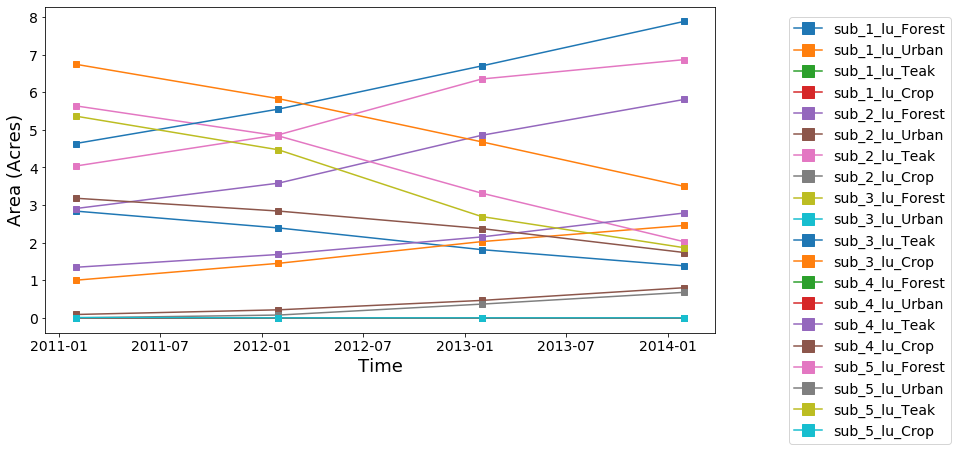

In [17]:
hru_object.plot_as_ts(min_xticks=3, max_xticks=4, save=True)

### `unique_lu_soil`
combination of land use and soil

Checking validity of landuse shapefile
soil 0 is valid now
soil 1 is valid now
soil 2 is valid now


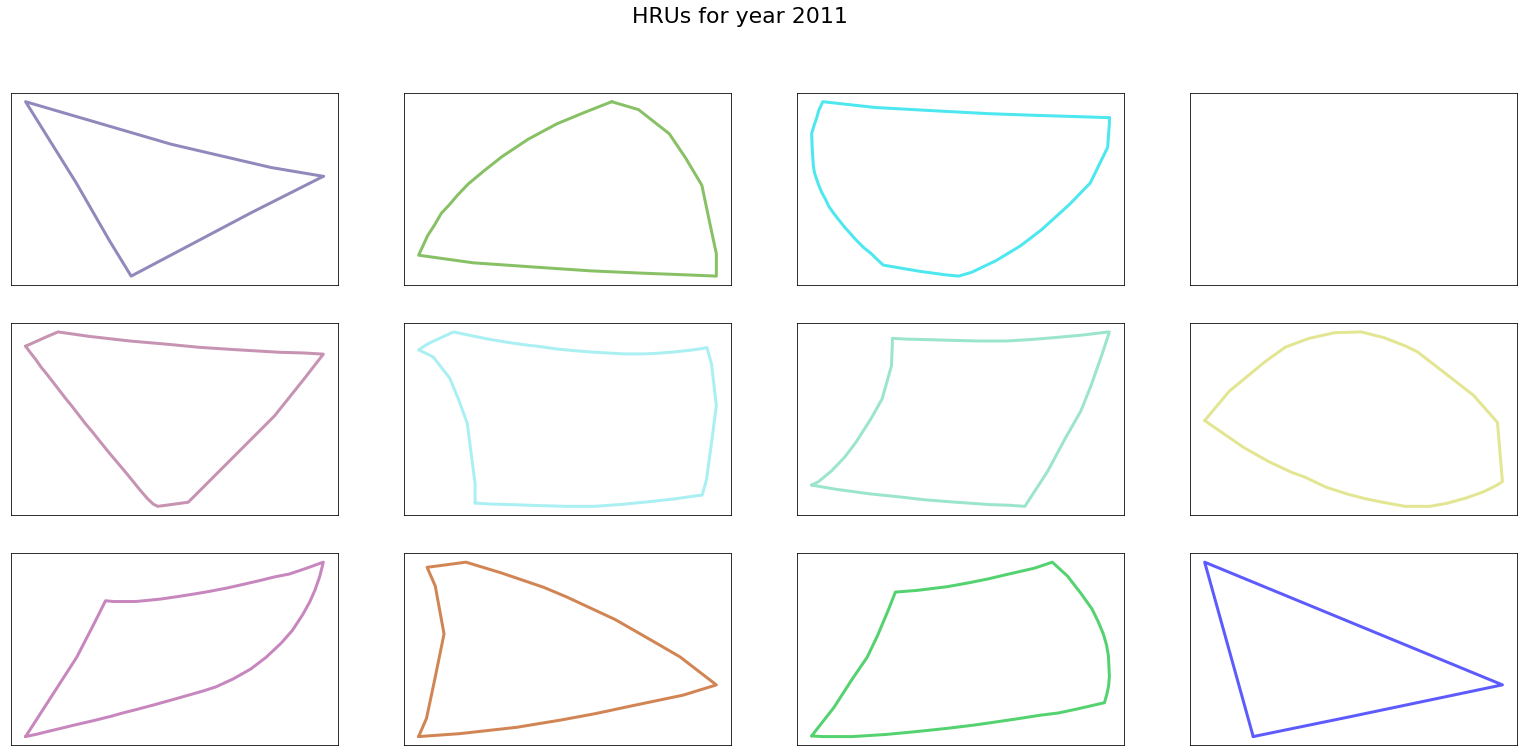

Checking validity of landuse shapefile
soil 0 is valid now
soil 1 is valid now
soil 2 is valid now


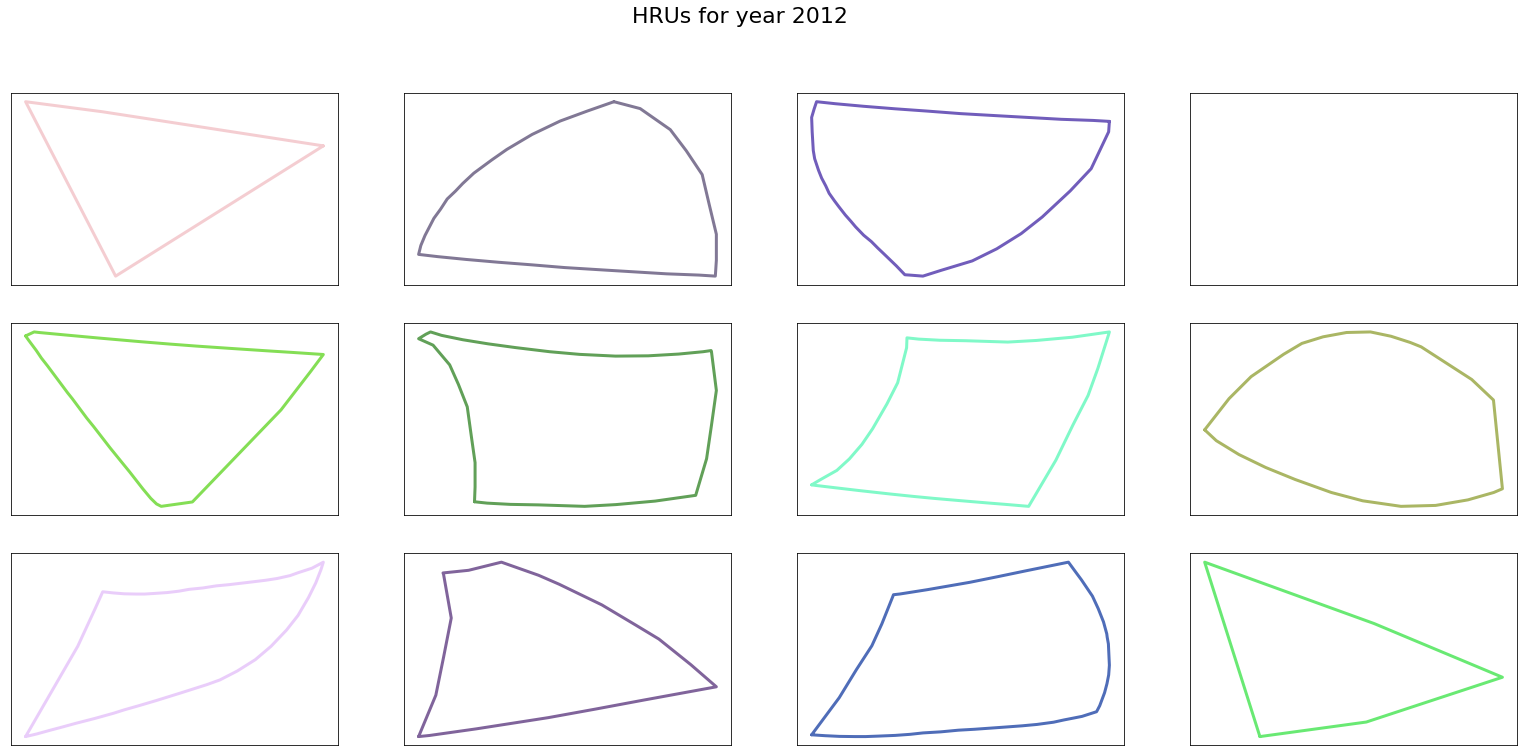

Checking validity of landuse shapefile
soil 0 is valid now
soil 1 is valid now
soil 2 is valid now


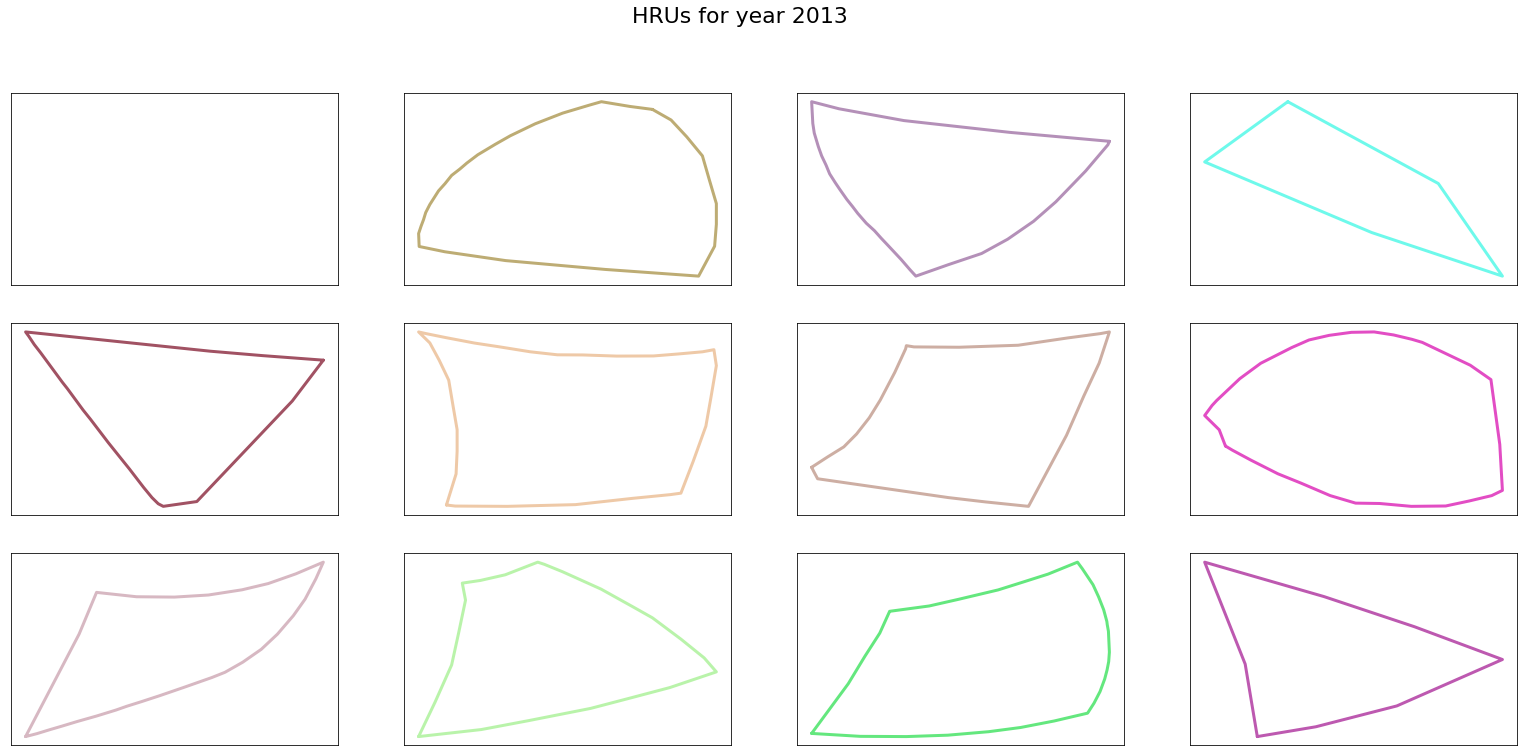

Checking validity of landuse shapefile
soil 0 is valid now
soil 1 is valid now
soil 2 is valid now


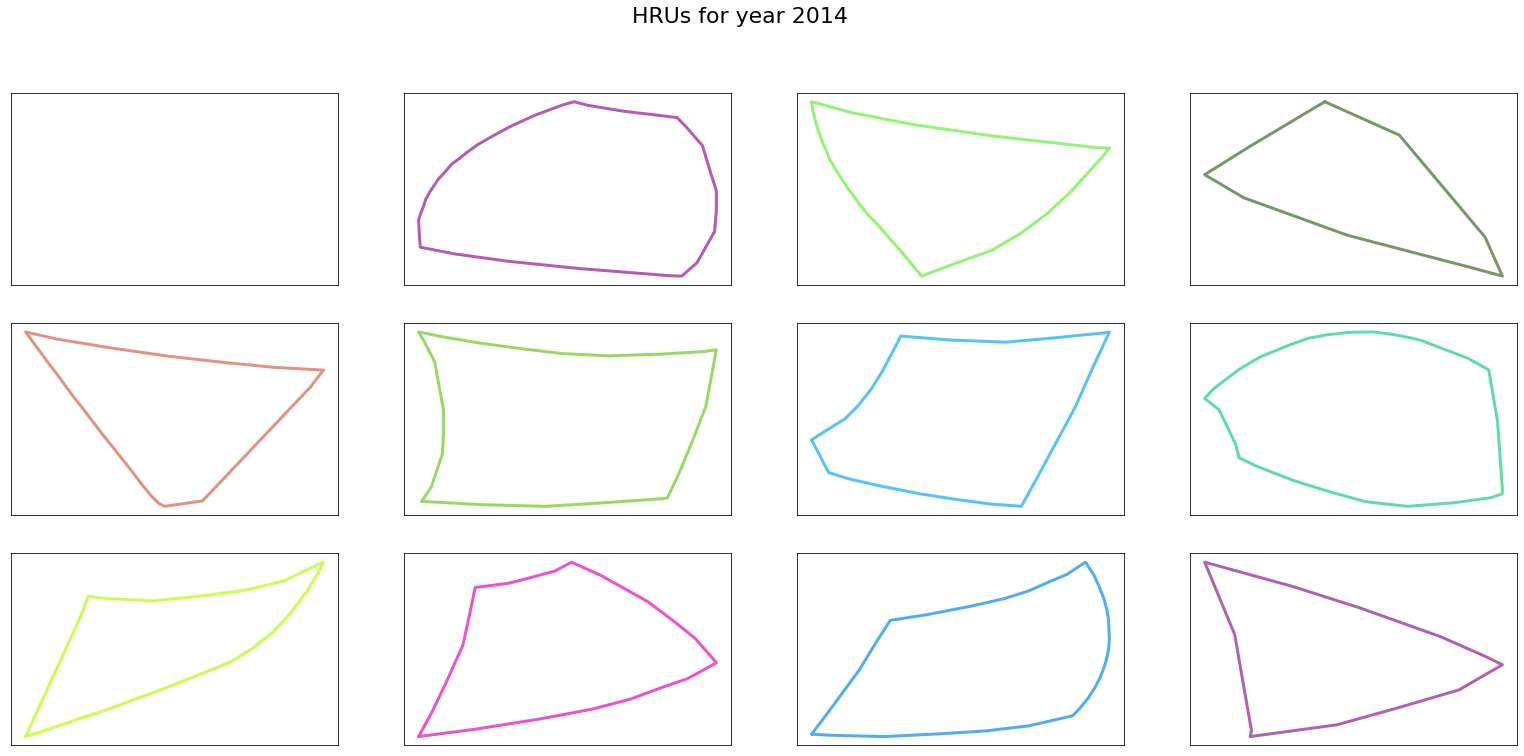

In [18]:
hru_object = MakeHRUs('unique_lu_soil',
                      index=years,
                      soil_shape={'shapefile': Soil_shp, 'feature': 'NAME'}
                     )

hru_object.call()

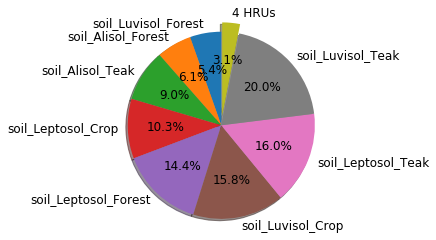

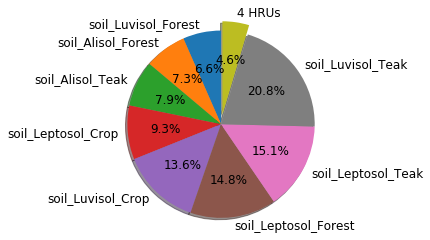

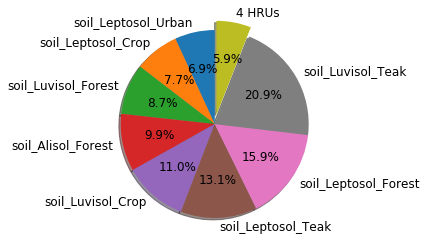

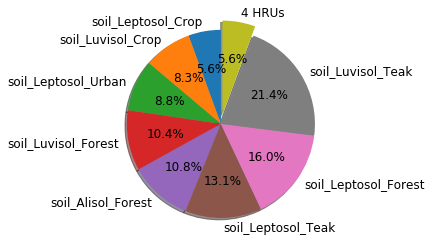

In [19]:
for yr in years:
    hru_object.draw_pie(yr, n_merge=4, title=False, save=True, textprops={'fontsize': '12'})

d:\mytools\ai4water\AI4Water\utils\spatial_processing.py:423: UserWarning: AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 6.
  plt.savefig(f'{name}_hru_as_ts.png', dpi=300, bbox_inches=bbox_inches)
C:\Users\USER\Anaconda3\envs\tfgpu21_py37\lib\site-packages\ipykernel\pylab\backend_inline.py:183: UserWarning: AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 6.
  for label in axis.get_ticklabels()])
C:\Users\USER\Anaconda3\envs\tfgpu21_py37\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 6.
  fig.canvas.print_figure(byt

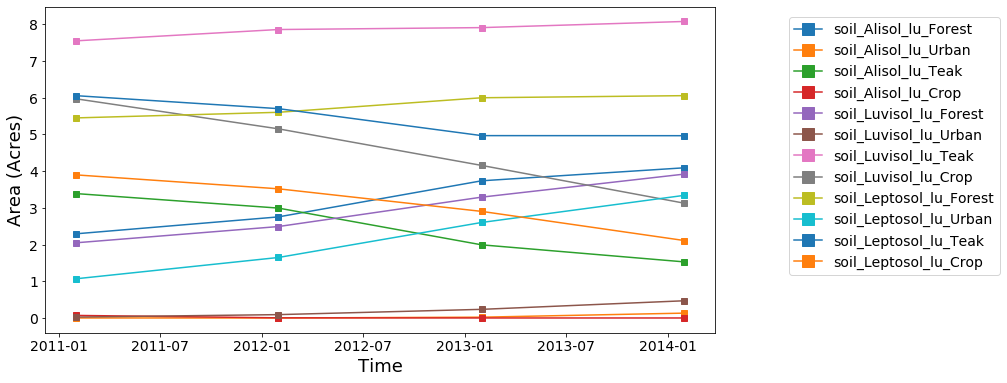

In [20]:
hru_object.plot_as_ts(min_xticks=3, max_xticks=4, save=True)

### `unique_lu_slope`

In [21]:
hru_object = MakeHRUs('unique_lu_slope',
                      index=years,
                      slope_shape={'shapefile': slope_shp, 'feature': 'percent'}
                     )

hru_object.call(False)

Checking validity of landuse shapefile
slope 0 is valid now
slope 1 is valid now
slope 2 is valid now
Checking validity of landuse shapefile
slope 0 is valid now
slope 1 is valid now
slope 2 is valid now
Checking validity of landuse shapefile
slope 0 is valid now
slope 1 is valid now
slope 2 is valid now
Checking validity of landuse shapefile
slope 0 is valid now
slope 1 is valid now
slope 2 is valid now


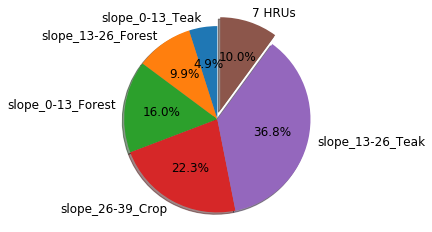

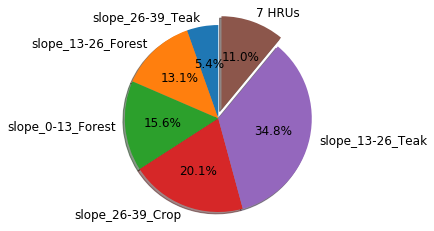

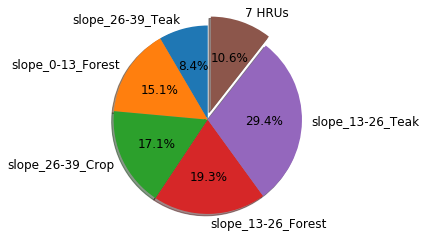

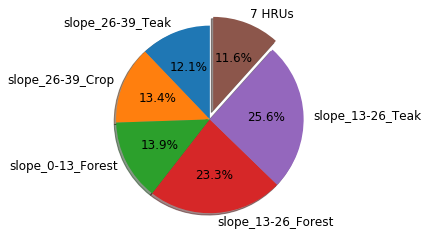

In [22]:
for yr in years:
    hru_object.draw_pie(yr, n_merge=7, title=False, save=True, textprops={'fontsize': '12'})

d:\mytools\ai4water\AI4Water\utils\spatial_processing.py:423: UserWarning: AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 6.
  plt.savefig(f'{name}_hru_as_ts.png', dpi=300, bbox_inches=bbox_inches)
C:\Users\USER\Anaconda3\envs\tfgpu21_py37\lib\site-packages\ipykernel\pylab\backend_inline.py:183: UserWarning: AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 6.
  for label in axis.get_ticklabels()])
C:\Users\USER\Anaconda3\envs\tfgpu21_py37\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 6.
  fig.canvas.print_figure(byt

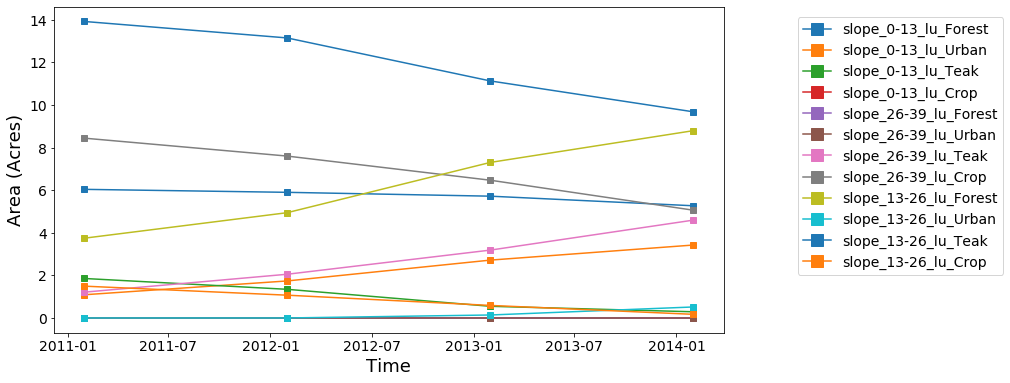

In [23]:
hru_object.plot_as_ts(min_xticks=3, max_xticks=4, save=True)

### `unique_soil_sub`
combination of soil type and sub-basin

Checking validity of landuse shapefile


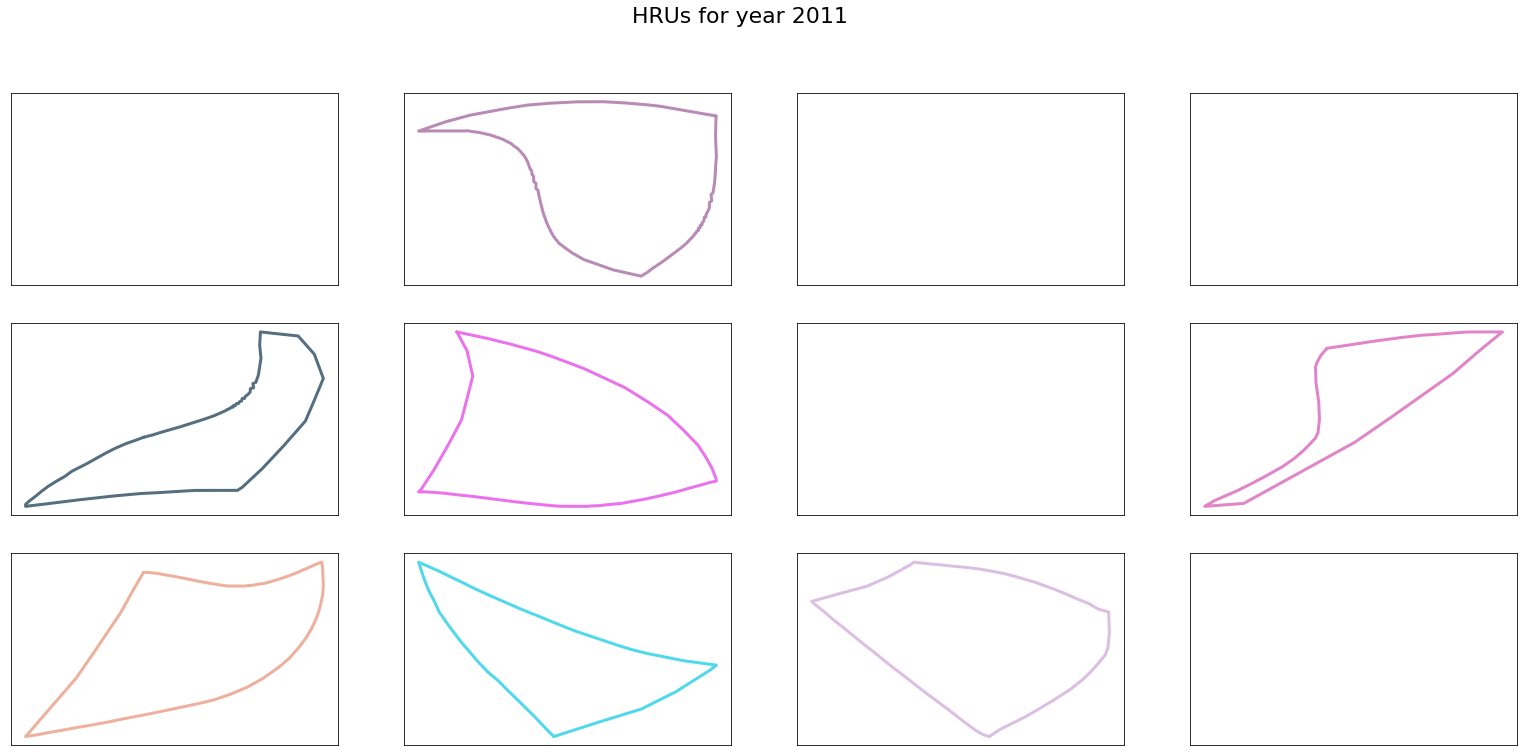

Checking validity of landuse shapefile


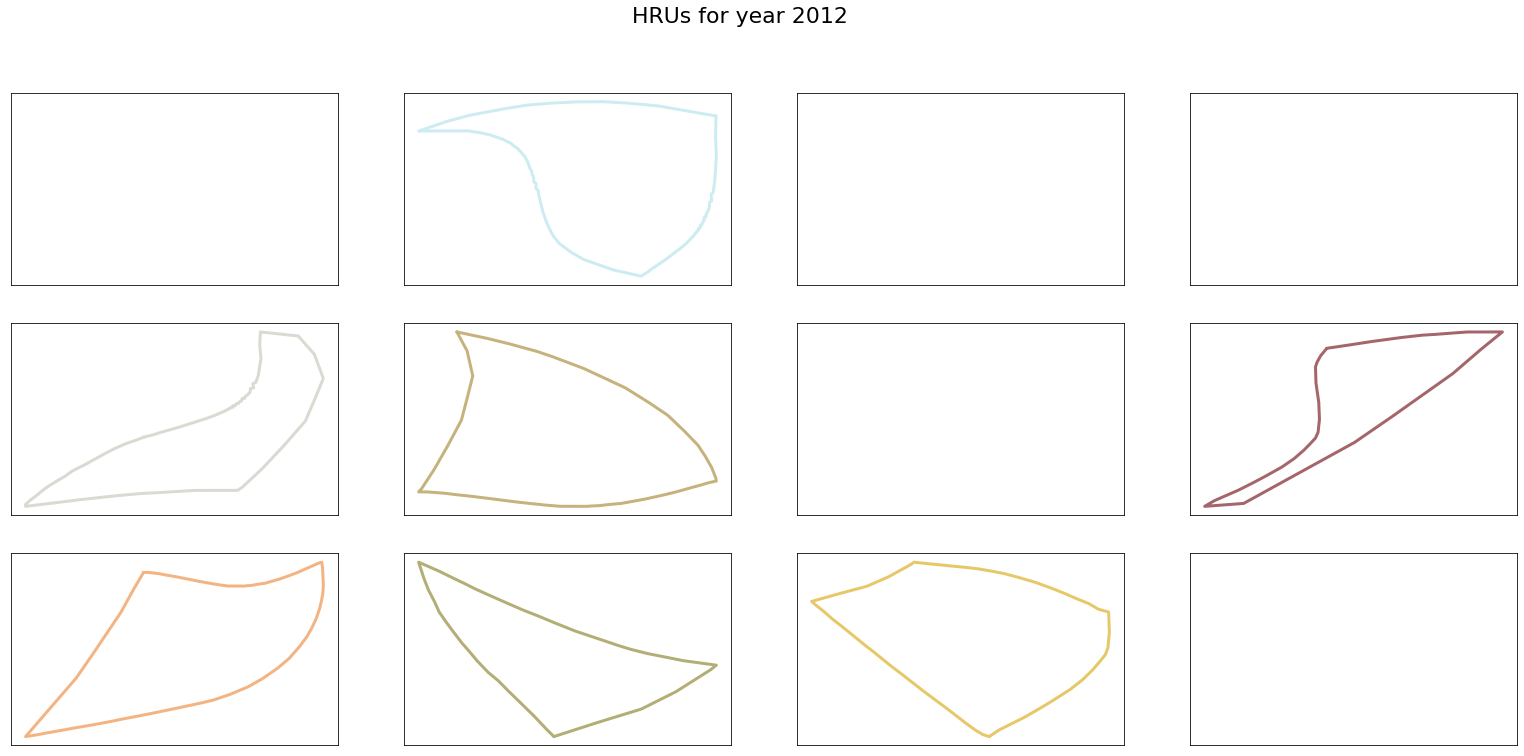

Checking validity of landuse shapefile


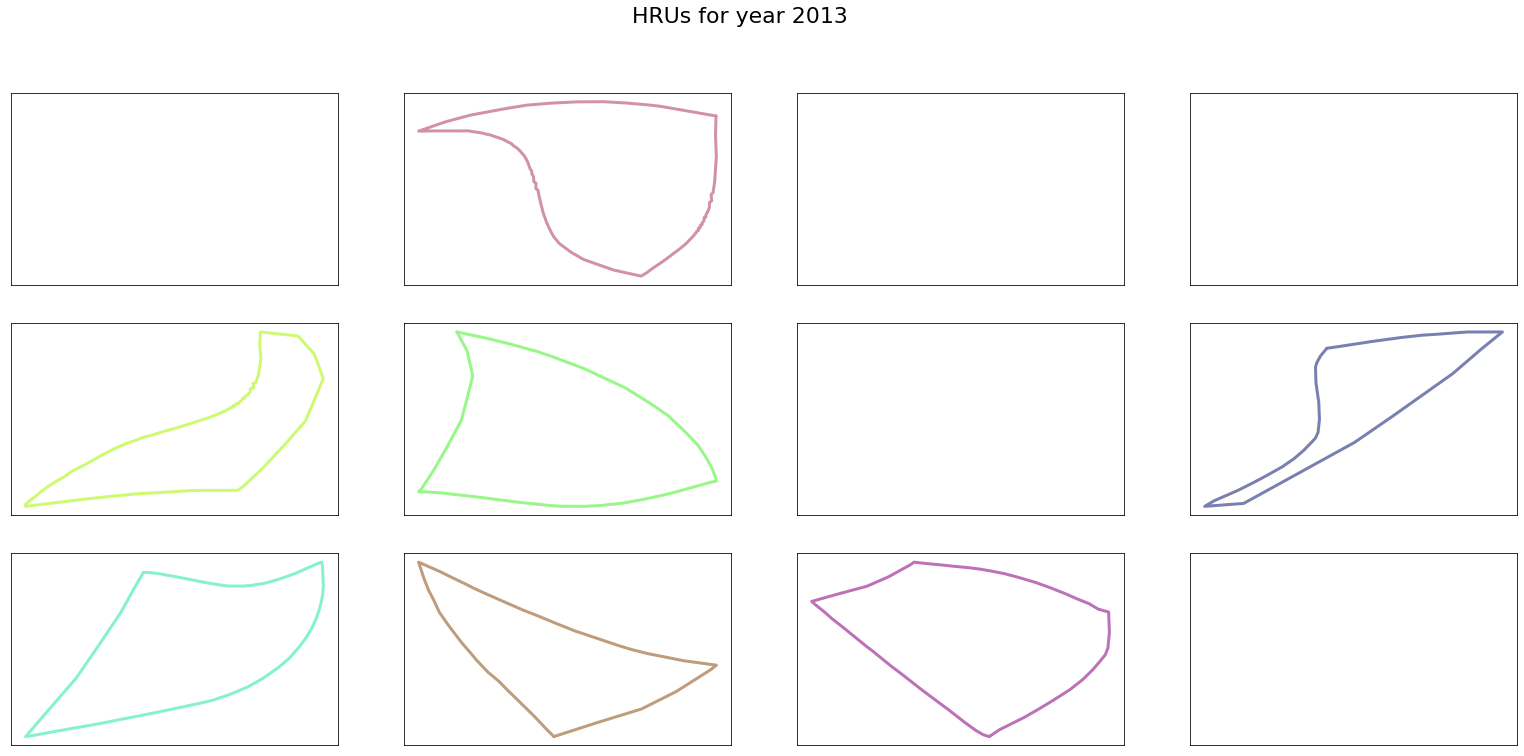

Checking validity of landuse shapefile


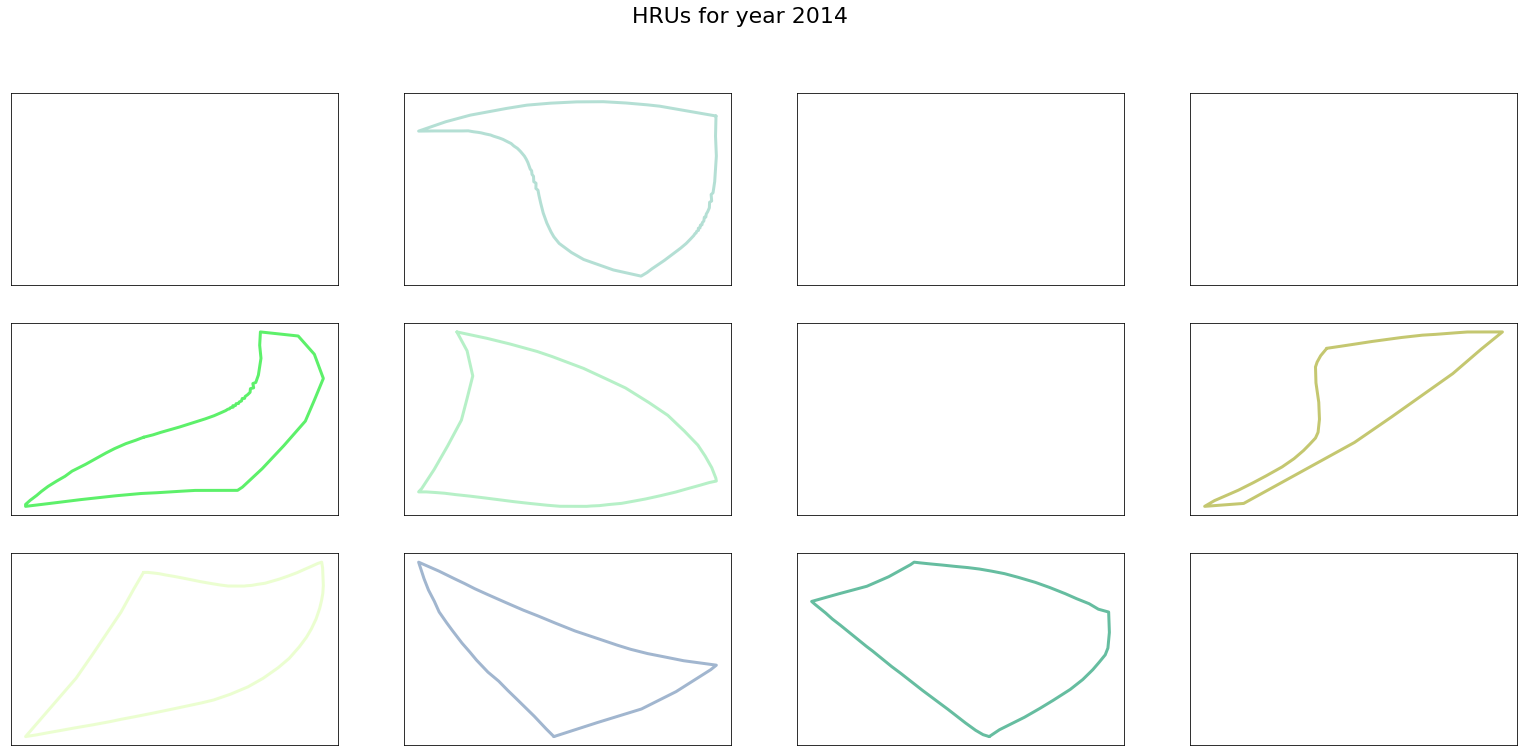

In [24]:
hru_object = MakeHRUs('unique_soil_sub',
                      index={2011: None, 2012: None, 2013:None, 2014:None},
                      subbasins_shape={'shapefile': SubBasin_shp, 'feature': 'id'},
                      soil_shape={'shapefile': Soil_shp, 'feature': 'NAME'}
                     )

hru_object.call()

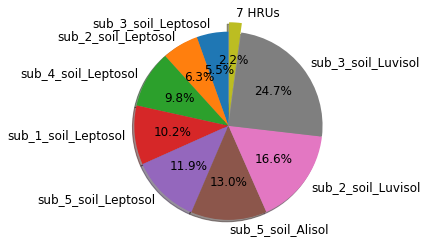

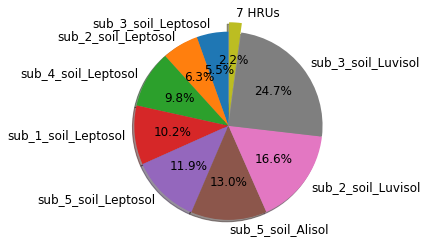

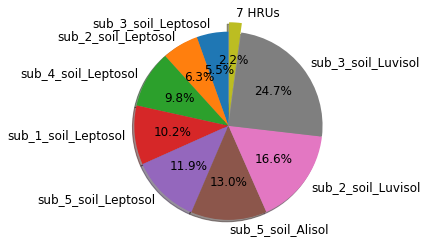

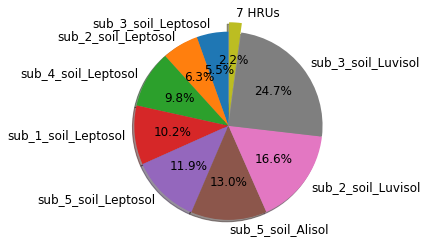

In [25]:
for yr in years:
    hru_object.draw_pie(yr, n_merge=7, title=False, save=True, textprops={'fontsize': '12'})

d:\mytools\ai4water\AI4Water\utils\spatial_processing.py:423: UserWarning: AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 6.
  plt.savefig(f'{name}_hru_as_ts.png', dpi=300, bbox_inches=bbox_inches)
C:\Users\USER\Anaconda3\envs\tfgpu21_py37\lib\site-packages\ipykernel\pylab\backend_inline.py:183: UserWarning: AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 6.
  for label in axis.get_ticklabels()])
C:\Users\USER\Anaconda3\envs\tfgpu21_py37\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 6.
  fig.canvas.print_figure(byt

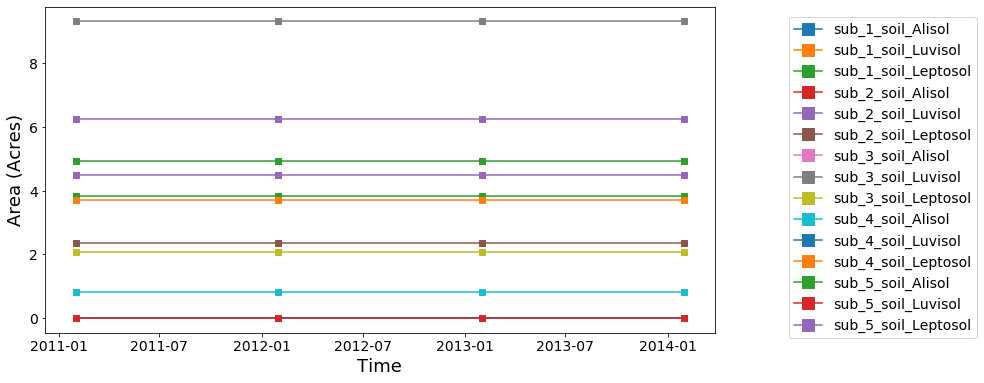

In [26]:
hru_object.plot_as_ts(min_xticks=3, max_xticks=4, save=True)

### `unique_soil_slope`
combination of soil types and slope categories

In [27]:
hru_object = MakeHRUs('unique_soil_slope',
                      index={2011: None, 2012: None, 2013:None, 2014:None},
                      slope_shape={'shapefile': slope_shp, 'feature': 'percent'},
                      soil_shape={'shapefile': Soil_shp, 'feature': 'NAME'}
                     )

hru_object.call(False)

Checking validity of landuse shapefile
slope 0 is valid now
slope 1 is valid now
slope 2 is valid now
Checking validity of landuse shapefile
slope 0 is valid now
slope 1 is valid now
slope 2 is valid now
Checking validity of landuse shapefile
slope 0 is valid now
slope 1 is valid now
slope 2 is valid now
Checking validity of landuse shapefile
slope 0 is valid now
slope 1 is valid now
slope 2 is valid now


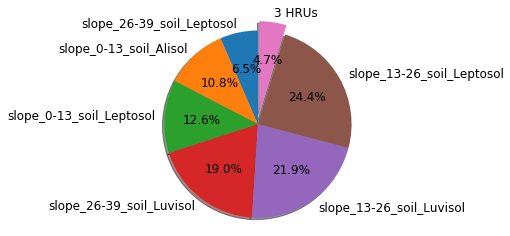

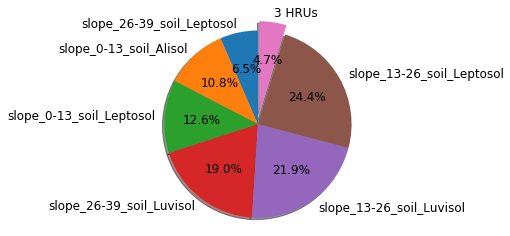

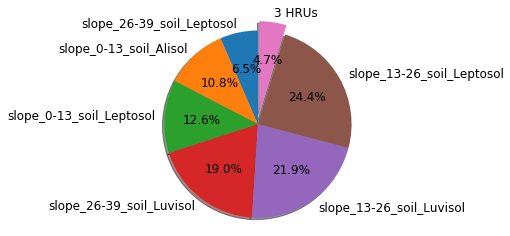

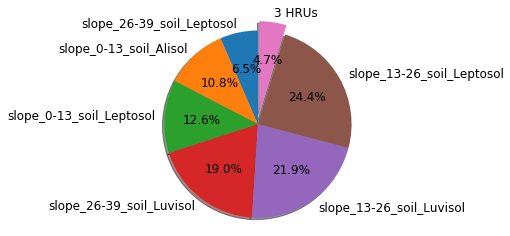

In [28]:
for yr in years:
    hru_object.draw_pie(yr, n_merge=3, title=False, save=True, textprops={'fontsize': '12'})

d:\mytools\ai4water\AI4Water\utils\spatial_processing.py:423: UserWarning: AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 6.
  plt.savefig(f'{name}_hru_as_ts.png', dpi=300, bbox_inches=bbox_inches)
C:\Users\USER\Anaconda3\envs\tfgpu21_py37\lib\site-packages\ipykernel\pylab\backend_inline.py:183: UserWarning: AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 6.
  for label in axis.get_ticklabels()])
C:\Users\USER\Anaconda3\envs\tfgpu21_py37\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 6.
  fig.canvas.print_figure(byt

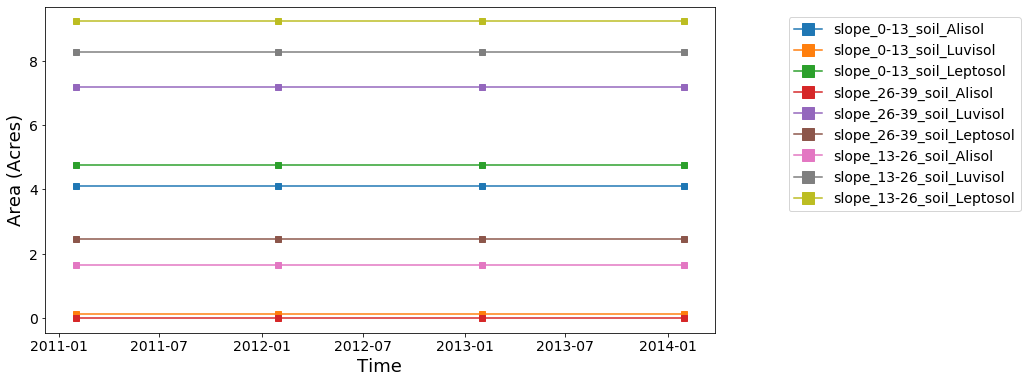

In [29]:
hru_object.plot_as_ts(min_xticks=3, max_xticks=4, save=True)

### `unique_slope_sub`
combination of slope categories and sub-basins

In [30]:
hru_object = MakeHRUs('unique_slope_sub',
                      index={2011: None, 2012: None, 2013:None, 2014:None},
                      slope_shape={'shapefile': slope_shp, 'feature': 'percent'},
                      subbasins_shape={'shapefile': SubBasin_shp, 'feature': 'id'}
                     )

hru_object.call(False)

Checking validity of landuse shapefile
Checking validity of landuse shapefile
Checking validity of landuse shapefile
Checking validity of landuse shapefile


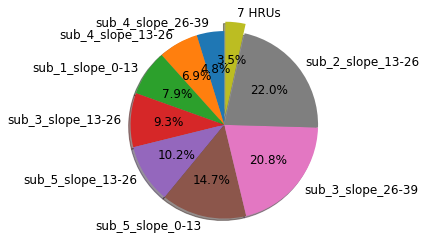

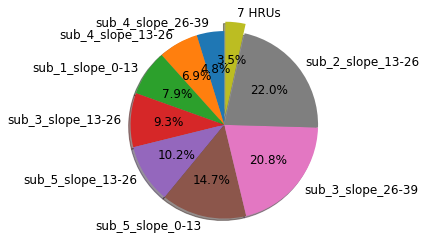

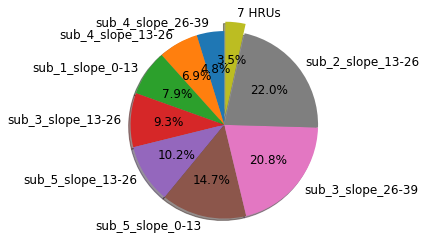

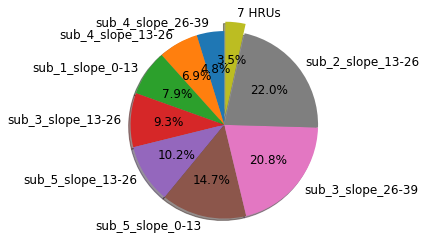

In [31]:
for yr in years:
    hru_object.draw_pie(yr, n_merge=7, title=False, save=True, textprops={'fontsize': '12'})

d:\mytools\ai4water\AI4Water\utils\spatial_processing.py:423: UserWarning: AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 6.
  plt.savefig(f'{name}_hru_as_ts.png', dpi=300, bbox_inches=bbox_inches)
C:\Users\USER\Anaconda3\envs\tfgpu21_py37\lib\site-packages\ipykernel\pylab\backend_inline.py:183: UserWarning: AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 6.
  for label in axis.get_ticklabels()])
C:\Users\USER\Anaconda3\envs\tfgpu21_py37\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 6.
  fig.canvas.print_figure(byt

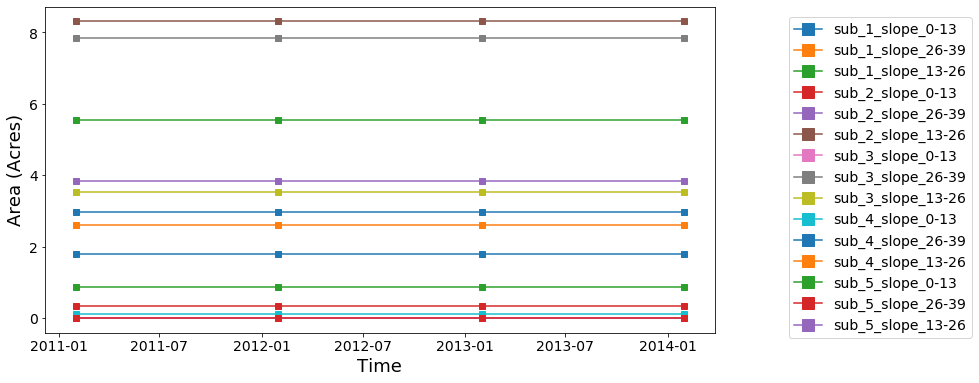

In [32]:
hru_object.plot_as_ts(min_xticks=3, max_xticks=4, save=True)

### `unique_lu_soil_slope`
combination of land use, soil and slope.

In [33]:
hru_object = MakeHRUs('unique_lu_soil_slope',
                      index=years,
                      slope_shape={'shapefile': slope_shp, 'feature': 'percent'},
                      soil_shape={'shapefile': Soil_shp, 'feature': 'NAME'},
                     )

hru_object.call(False)

Checking validity of landuse shapefile
soil 0 is valid now
soil 1 is valid now
soil 2 is valid now
Checking validity of landuse shapefile
soil 0 is valid now
soil 1 is valid now
soil 2 is valid now
Checking validity of landuse shapefile
soil 0 is valid now
soil 1 is valid now
soil 2 is valid now
Checking validity of landuse shapefile
soil 0 is valid now
soil 1 is valid now
soil 2 is valid now


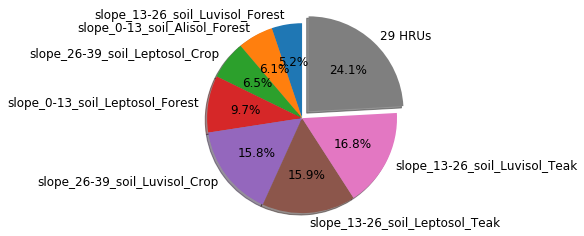

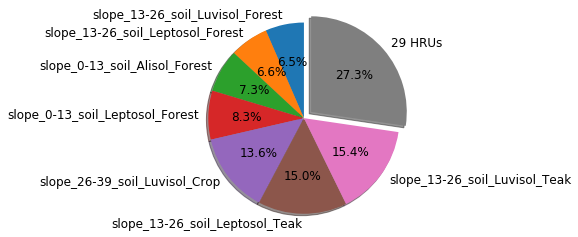

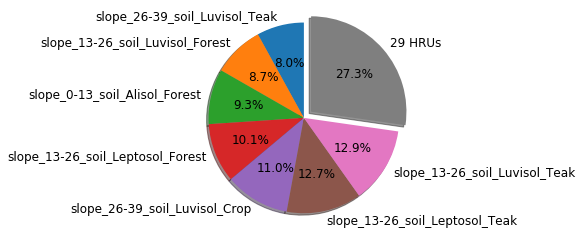

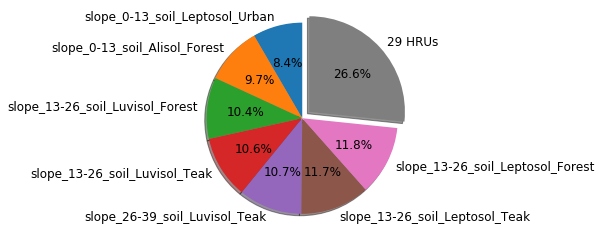

In [34]:
for yr in years:
    hru_object.draw_pie(yr, n_merge=29, title=False, save=True, textprops={'fontsize': '12'})

d:\mytools\ai4water\AI4Water\utils\spatial_processing.py:423: UserWarning: AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 6.
  plt.savefig(f'{name}_hru_as_ts.png', dpi=300, bbox_inches=bbox_inches)
C:\Users\USER\Anaconda3\envs\tfgpu21_py37\lib\site-packages\ipykernel\pylab\backend_inline.py:183: UserWarning: AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 6.
  for label in axis.get_ticklabels()])
C:\Users\USER\Anaconda3\envs\tfgpu21_py37\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 6.
  fig.canvas.print_figure(byt

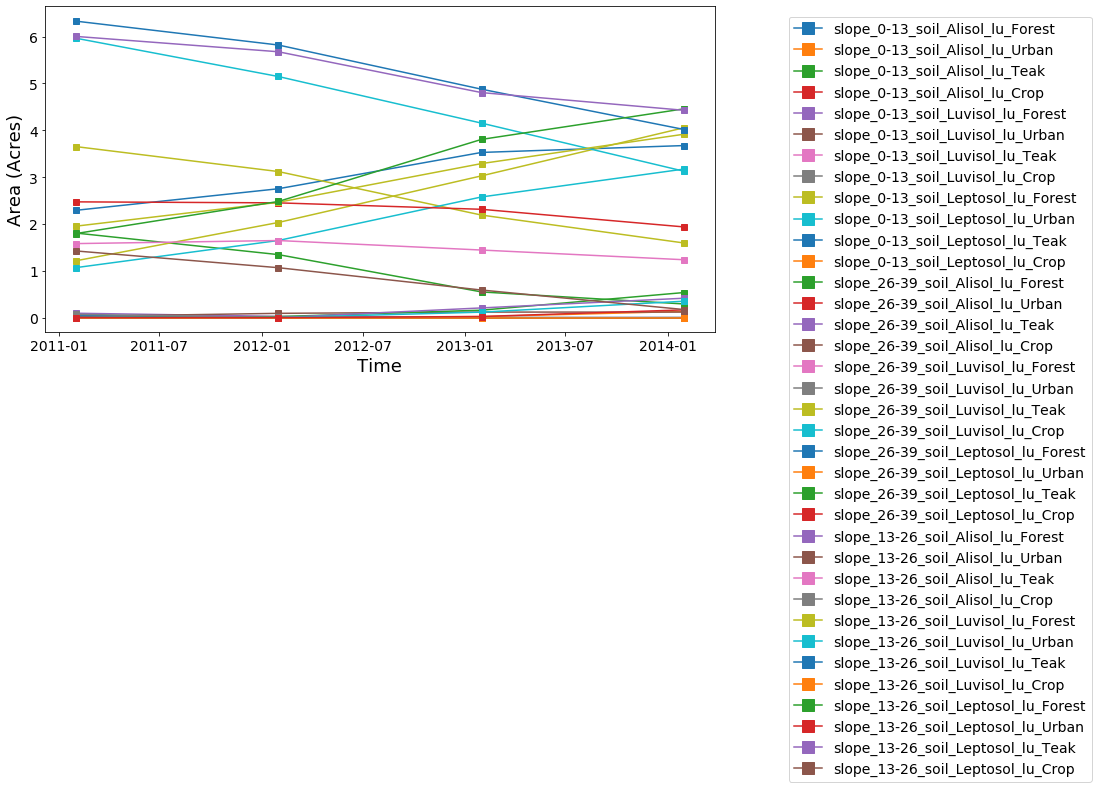

In [35]:
hru_object.plot_as_ts(min_xticks=3, max_xticks=4, save=True)